In [1]:
library(astsa)
options(repr.plot.width=15, repr.plot.height=8) #ajusta tamaño de graficas
library(dplyr)
#install.packages("xts")                      # Install & load xts package
library("xts")
library(lubridate)
library(forecast) 
#install.packages("fGarch")
library(fGarch)
#install.packages("rugarch")
library(rugarch)
library(tseries)
#install.packages("fDMA")
library(fDMA)
#install.packages("dynlm")
library(dynlm)
#install.packages("FinTS")
library(FinTS)




Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'xts' was built under R version 3.6.3"
Loading required package: zoo

Warning message:
"package 'zoo' was built under R version 3.6.3"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



Attaching package: 'xts'


The following objects are masked from 'package:dplyr':

    first, last



Attaching package: 'lubridate'


The following object is masked from 'package:base':

    date


Warning message:
"package 'forecast' was built under R version 3.6.3"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: 'forecast'


The following object is masked from 'package:astsa':

    gas


Warning message:
"package 'fGarch' was built under R versi

# GOLD

In [2]:
df_gold = read.csv("gold_price_data.csv")
head(df_gold,15)
tail(df_gold)

,Date,Value
,<fct>,<dbl>
1,1970-01-01,35.2
2,1970-04-01,35.1
3,1970-07-01,35.4
4,1970-10-01,36.2
5,1971-01-01,37.4
6,1971-04-01,38.9
7,1971-07-01,40.1
8,1971-10-01,42.0
9,1972-01-03,43.5


,Date,Value
,<fct>,<dbl>
10782,2020-03-06,1683.65
10783,2020-03-09,1672.50
10784,2020-03-10,1655.70
10785,2020-03-11,1653.75
10786,2020-03-12,1570.70
10787,2020-03-13,1562.80


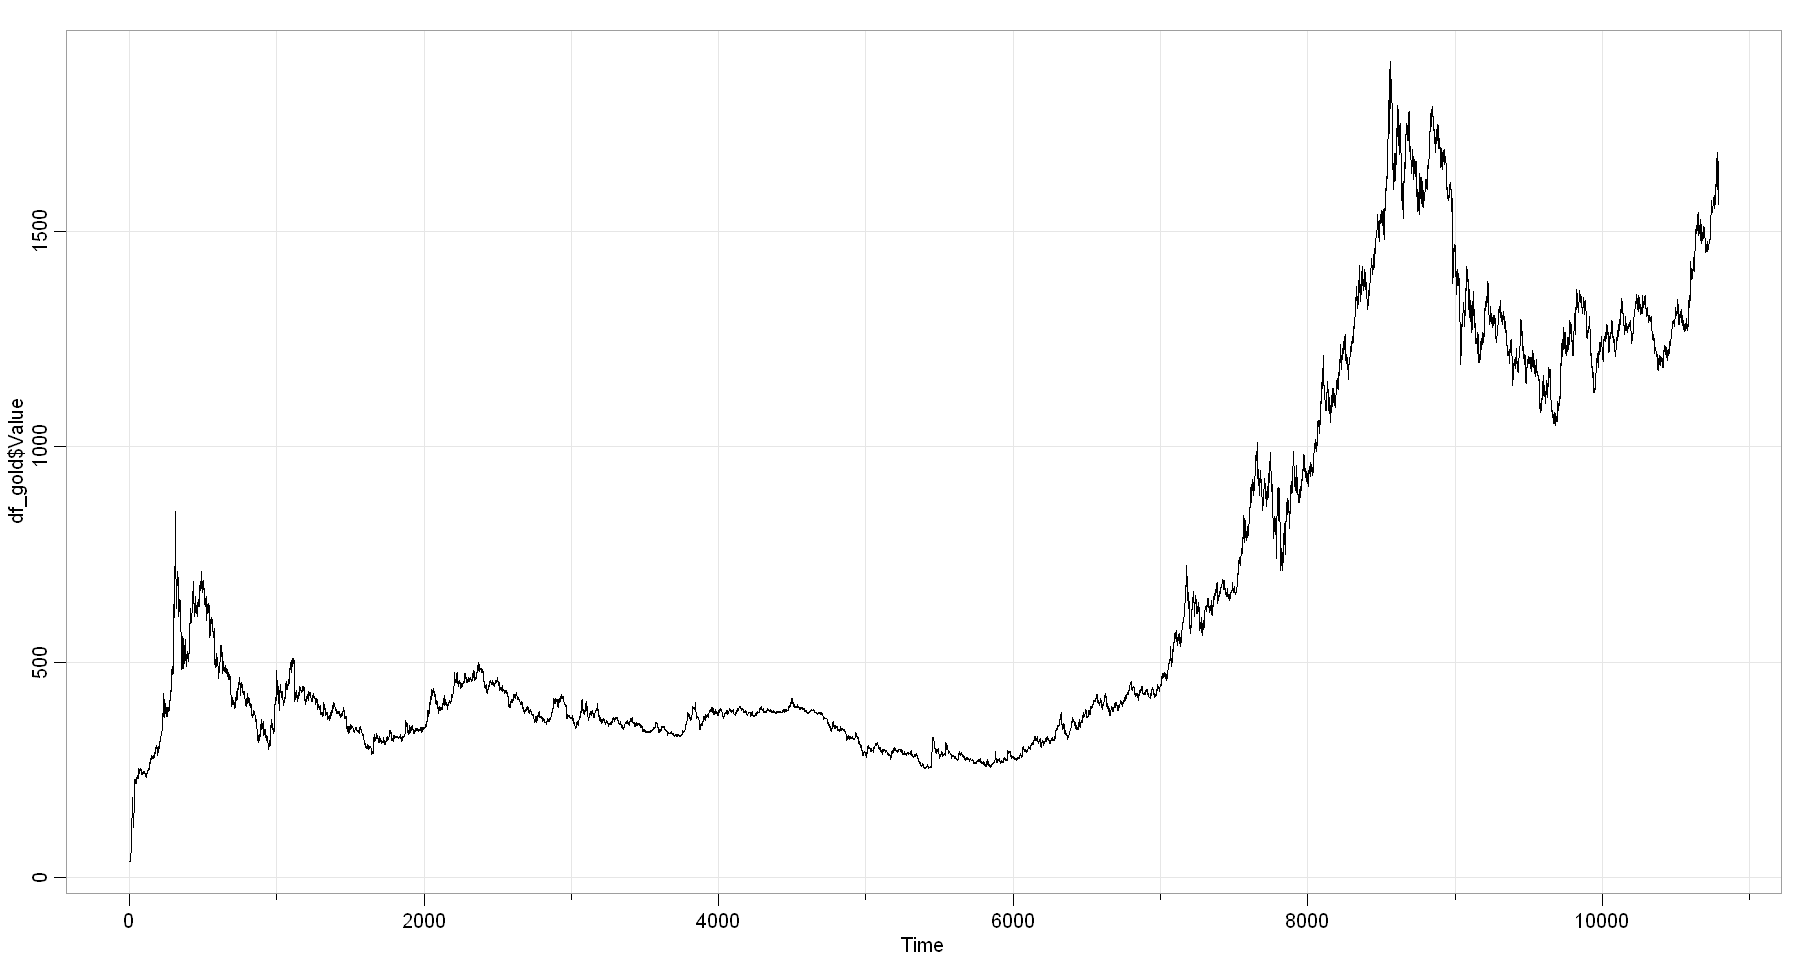

In [3]:
tsplot(df_gold$Value)

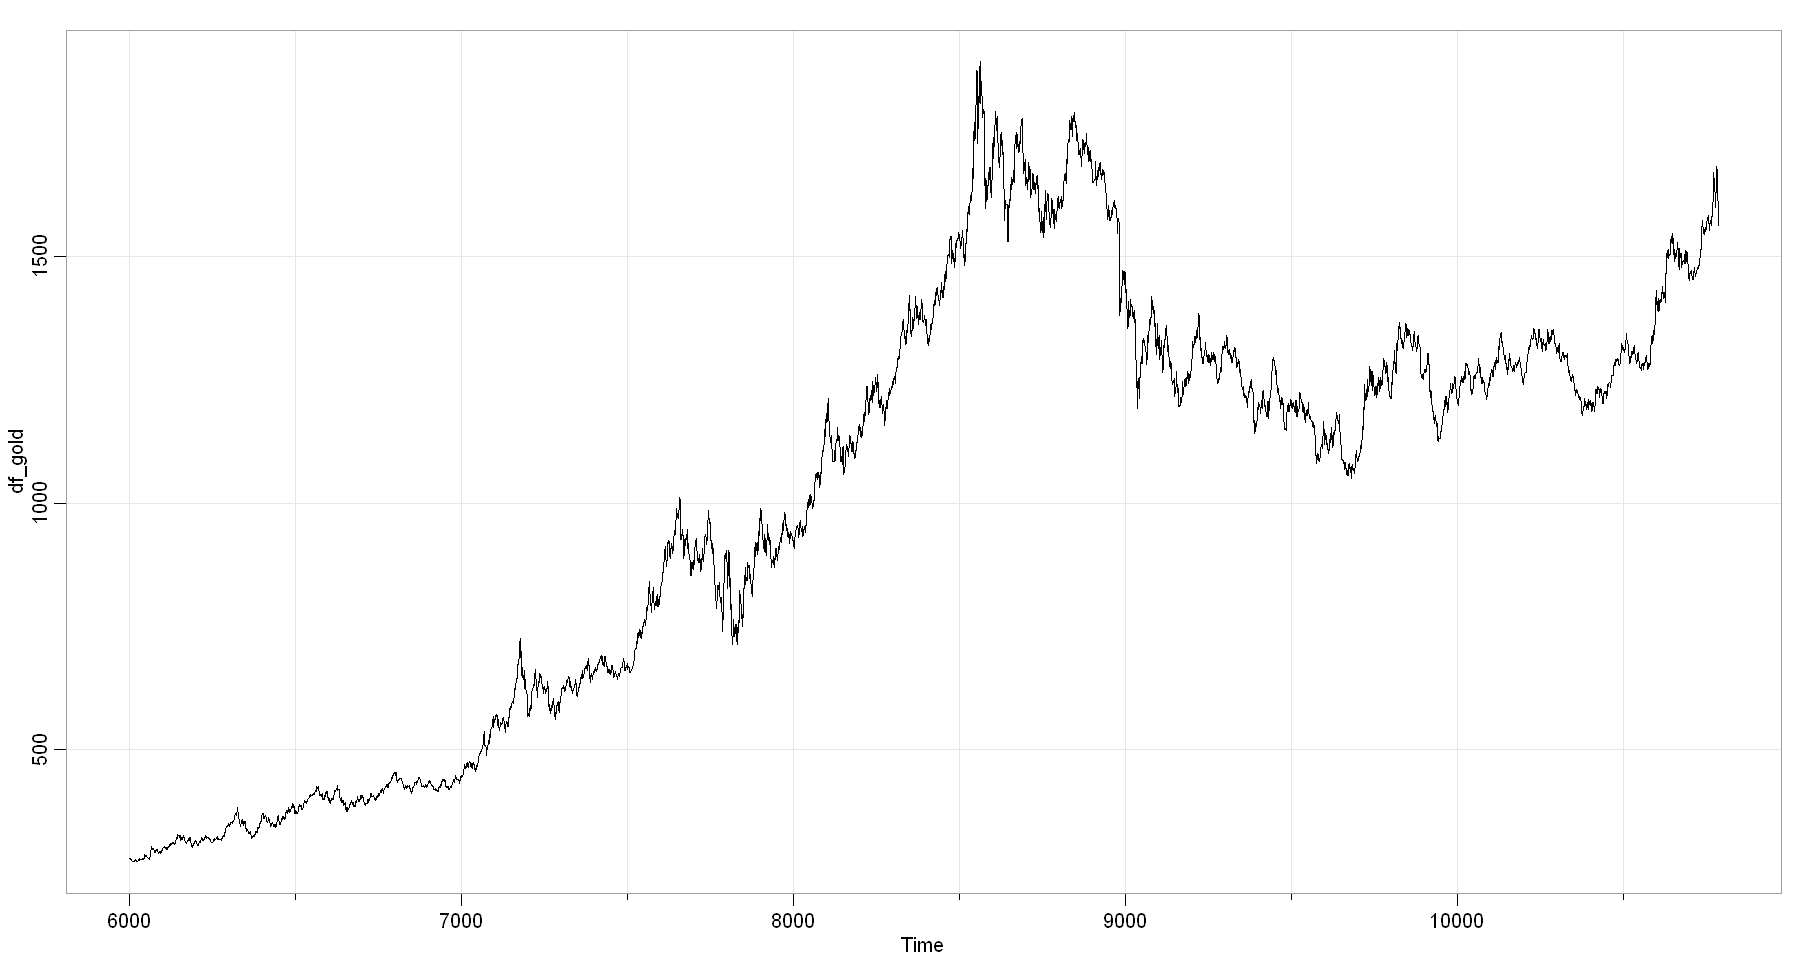

In [4]:
#Reducimos los datos dado que son muchos
df_gold = ts(df_gold$Value[6000:length(df_gold$Value)],start = 6000)
tsplot(df_gold)

In [5]:
#Aplico shapiro test para normalidad
shapiro.test(df_gold)
#Ver limitante de 5000 datos en test de shapiro pero nos da que es significativo por lo que rechazo la hipotesis nula de que los datos tiene varianza normal.



	Shapiro-Wilk normality test

data:  df_gold
W = 0.92626, p-value < 2.2e-16


In [6]:
#tsplot(oil) #Hay correlacion

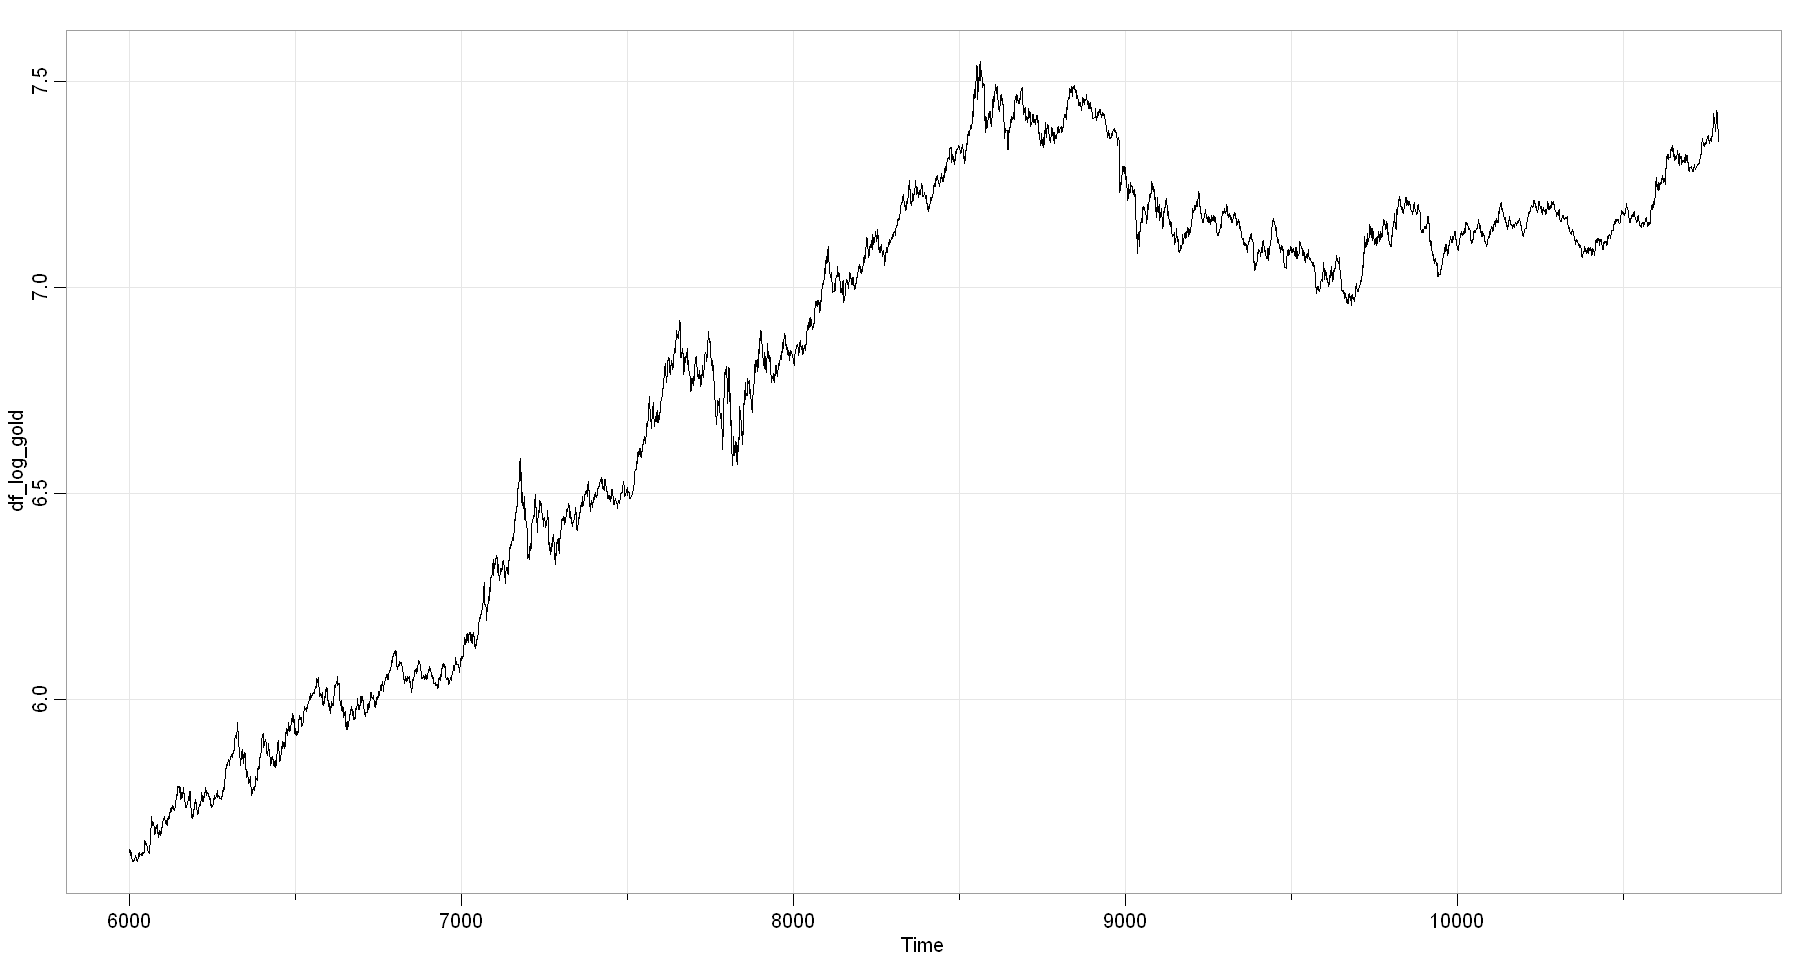

In [7]:
df_log_gold = log(df_gold)
tsplot(df_log_gold)

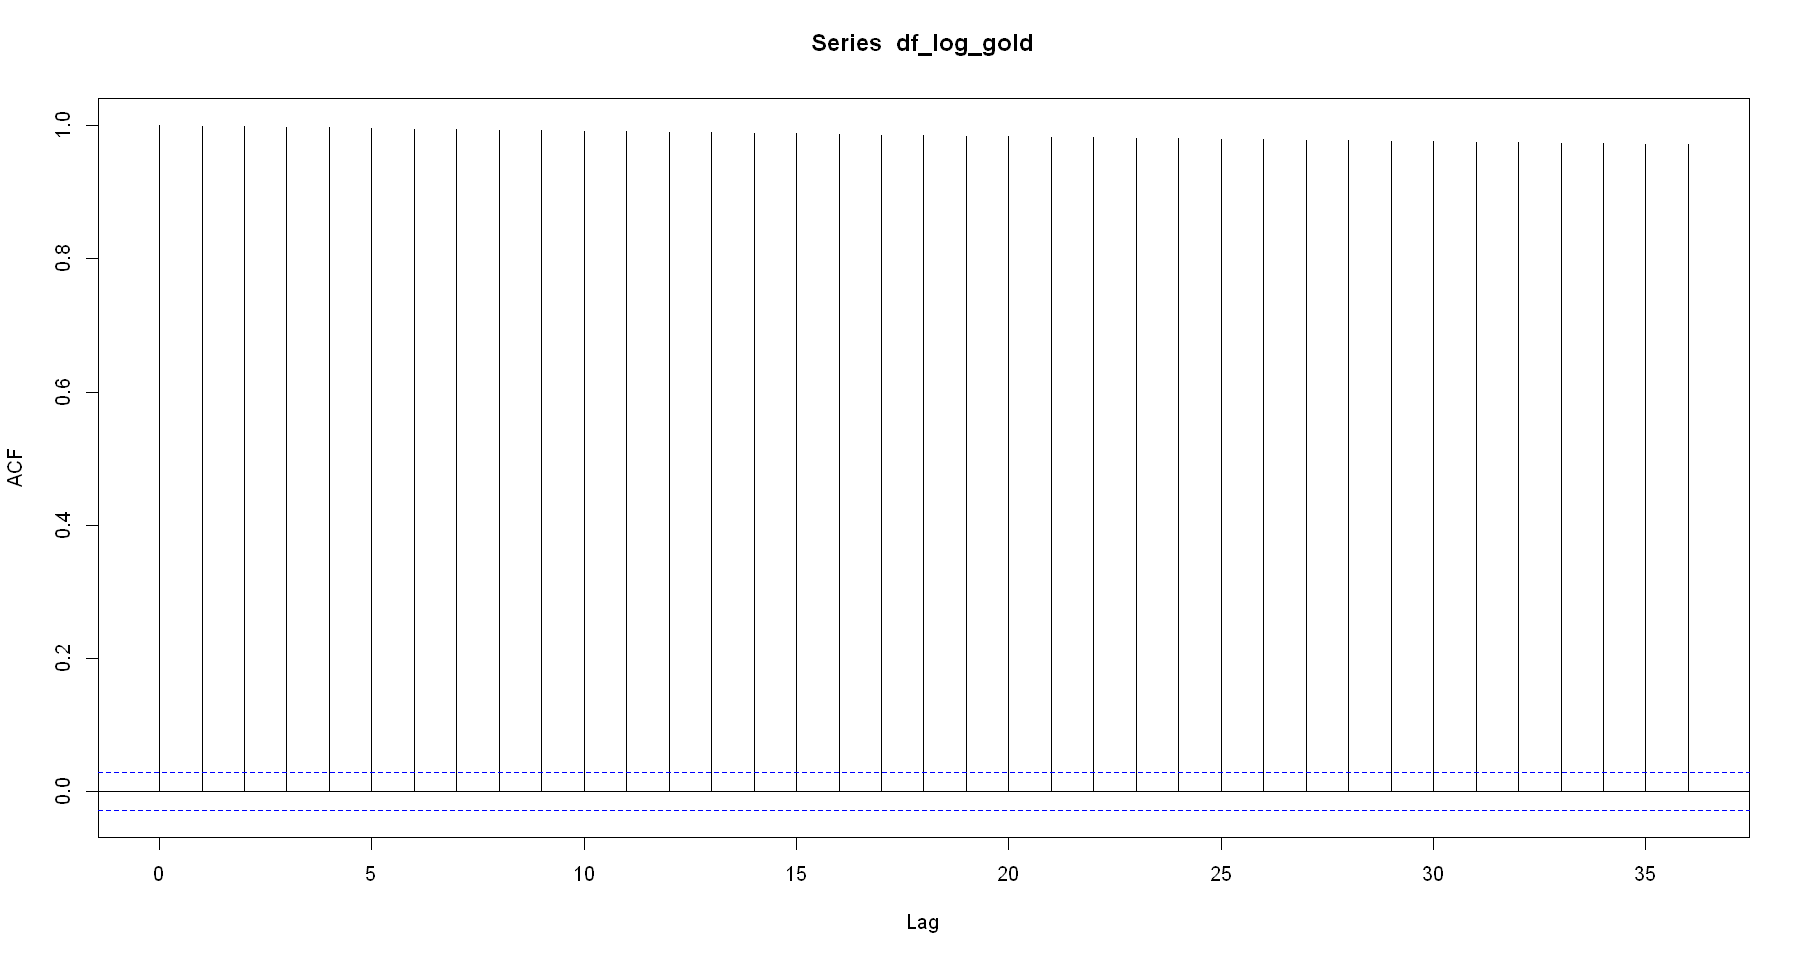

In [8]:
acf(df_log_gold)
#No es estacionaria , por eso si aplicamos el diff si generamos estacionalidad.

In [9]:
#df_diff_gold = diff(df_gold$Value)
#tsplot(df_diff_gold)

In [10]:
#acf2(df_diff_gold)

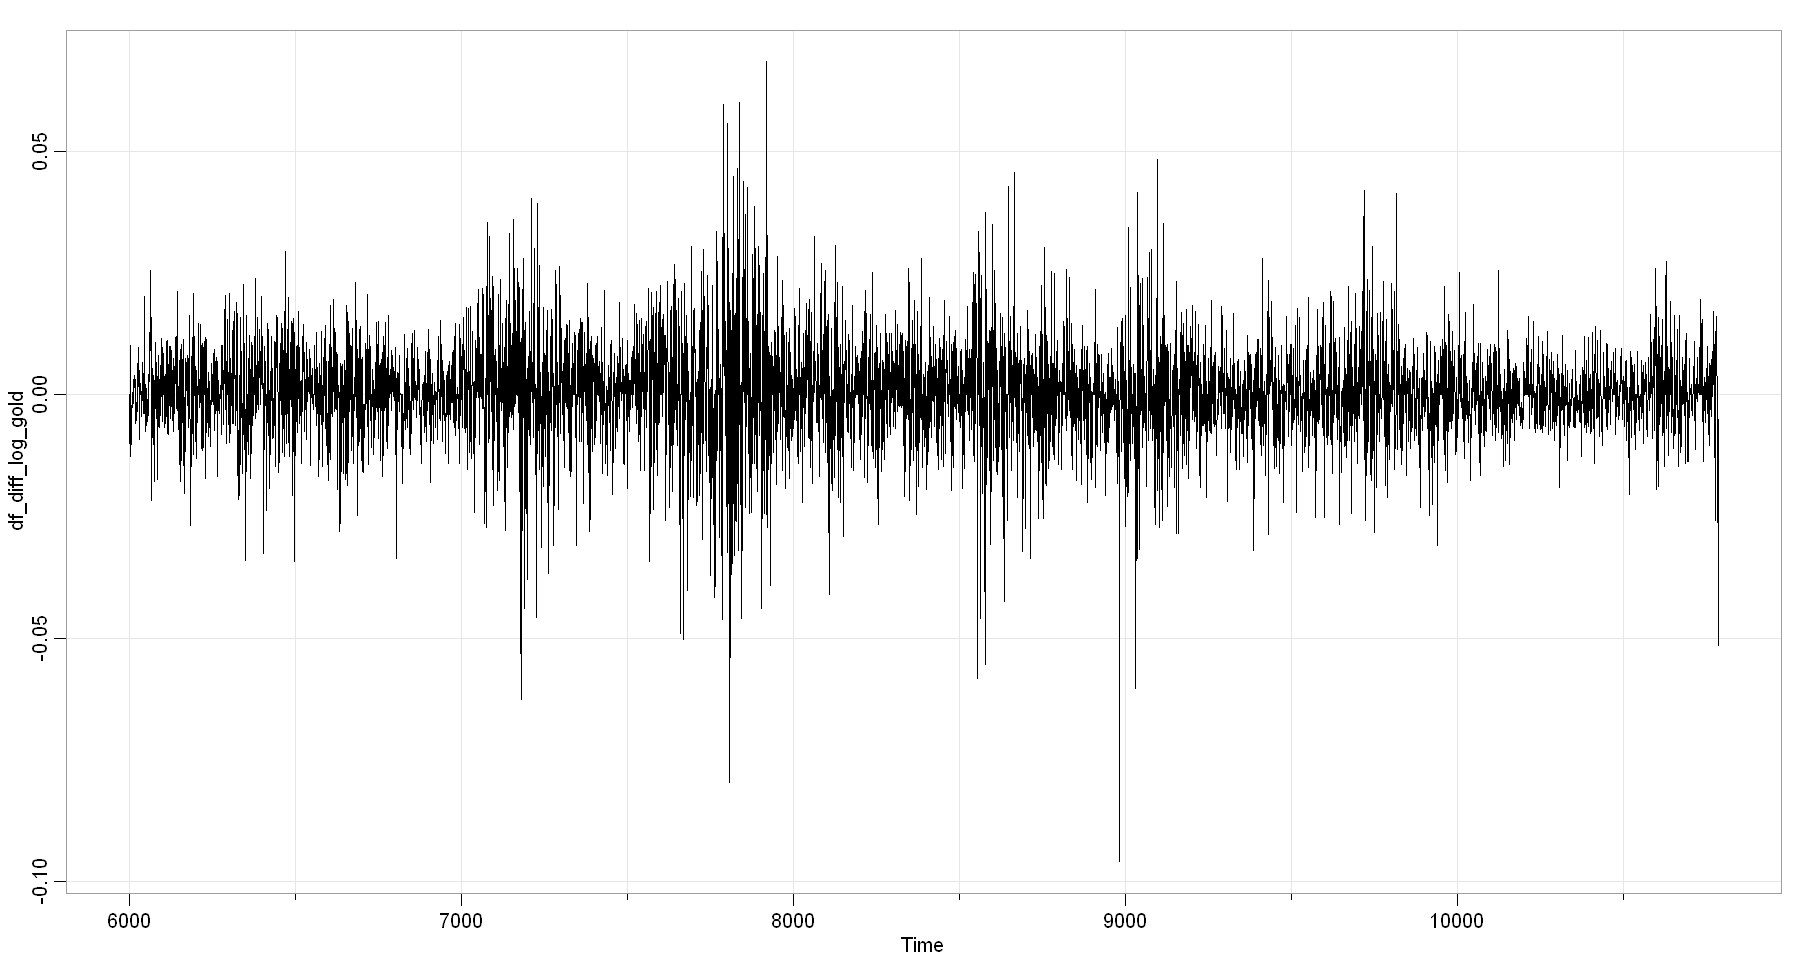

In [11]:
#Como crece año a año aplicamos la diferencia de logaritmos para ver el retorno o tasa de crecimiento.
#Adicionalmente esto permite centrar en cero utilizando esta tecnica en lugar de quitar la tendencia con una recta que no es tan clara.
df_diff_log_gold = diff(log(df_gold))
tsplot(df_diff_log_gold)

In [12]:
length(df_diff_log_gold)

[1] 4787

Vemos como la serie no es estacionaria por los picos de varianza que tiene.

In [13]:
#Separo train y test en el diff

train = ts(df_diff_log_gold[0:4740],start = 6001)
test = ts(df_diff_log_gold[4740:length(df_diff_log_gold)],start = 10751)


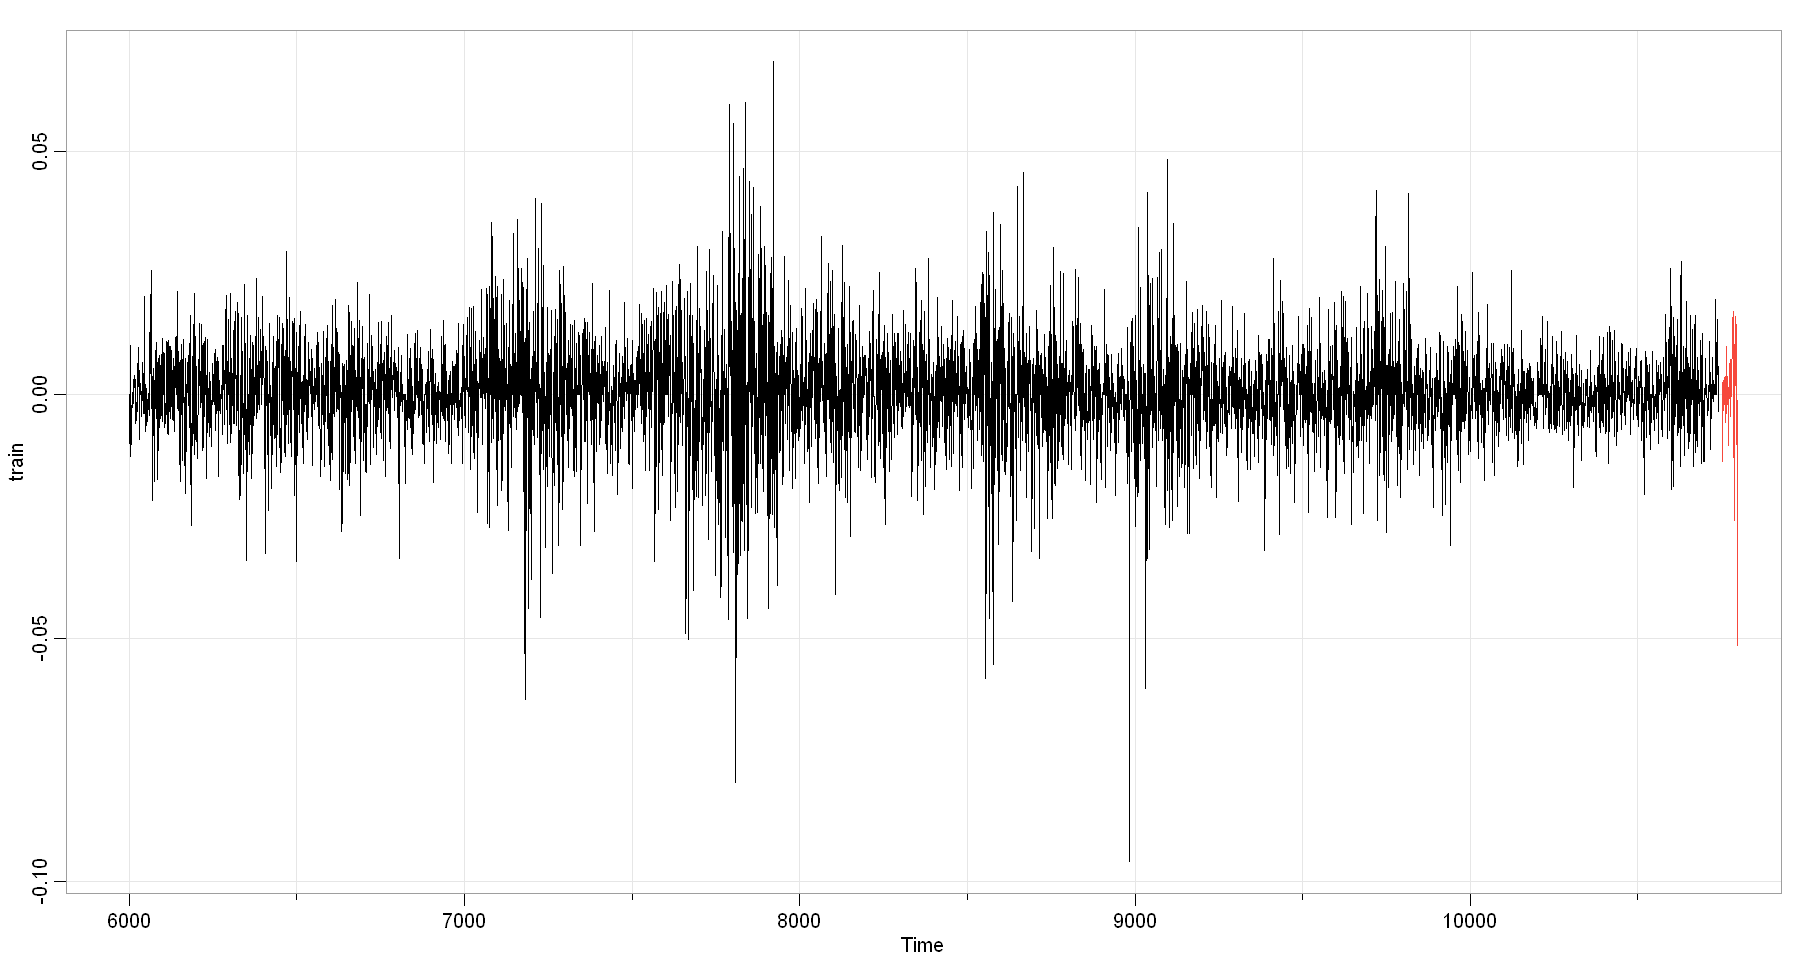

In [14]:
tsplot(train)
lines(test,col=2)

In [15]:
df_diff_log_gold[4738:length(df_diff_log_gold)]
tail(train,1)
head(test,1)
#Ultimo valor del df es el de train y el siguiente es el primero de test. Quedo bien.

[1]  0.0156000409 -0.0033429408  0.0026116328 -0.0135782020  0.0018361337
 [6] -0.0023844058 -0.0031017795  0.0025209283  0.0035765532  0.0019600604
[11]  0.0016357954 -0.0056886814  0.0036033756  0.0038464052  0.0008953697
[16]  0.0100496966 -0.0038679862 -0.0003494893  0.0030459775  0.0037629098
[21] -0.0059830185 -0.0104689603 -0.0032458692  0.0064172716  0.0059631229
[26]  0.0003496670 -0.0017177216 -0.0043392321  0.0072322099  0.0040235128
[31] -0.0003794826  0.0057086241  0.0089855178  0.0091834847  0.0148977405
[36]  0.0171047474 -0.0128540730 -0.0093754492  0.0104050347 -0.0258456681
[41] -0.0063561516  0.0098596510  0.0161791486  0.0107529546  0.0143874463
[46] -0.0066445427 -0.0100956329 -0.0011784437 -0.0515240566 -0.0050422957

A Time Series:
[1] 0.002611633

A Time Series:
[1] 0.002611633

In [16]:
#APlicamos test para ver si es estacionario
adf.test(train,k=2)
#VER QUE NO SE ENTIENDE EL RESULTADO, ES ESTACIONARIO?

Warning message in adf.test(train, k = 2):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  train
Dickey-Fuller = -39.682, Lag order = 2, p-value = 0.01
alternative hypothesis: stationary


ACF,0,-0.01,0.01,0.01,0,-0.03,-0.01,-0.01,0.02,-0.02,...,0.02,-0.02,-0.01,-0.04,-0.02,0.01,0.02,-0.01,0.01,-0.01
PACF,0,-0.01,0.01,0.01,0,-0.03,-0.01,-0.01,0.02,-0.02,...,0.02,-0.01,-0.01,-0.04,-0.01,0.01,0.01,0.00,0.00,-0.01


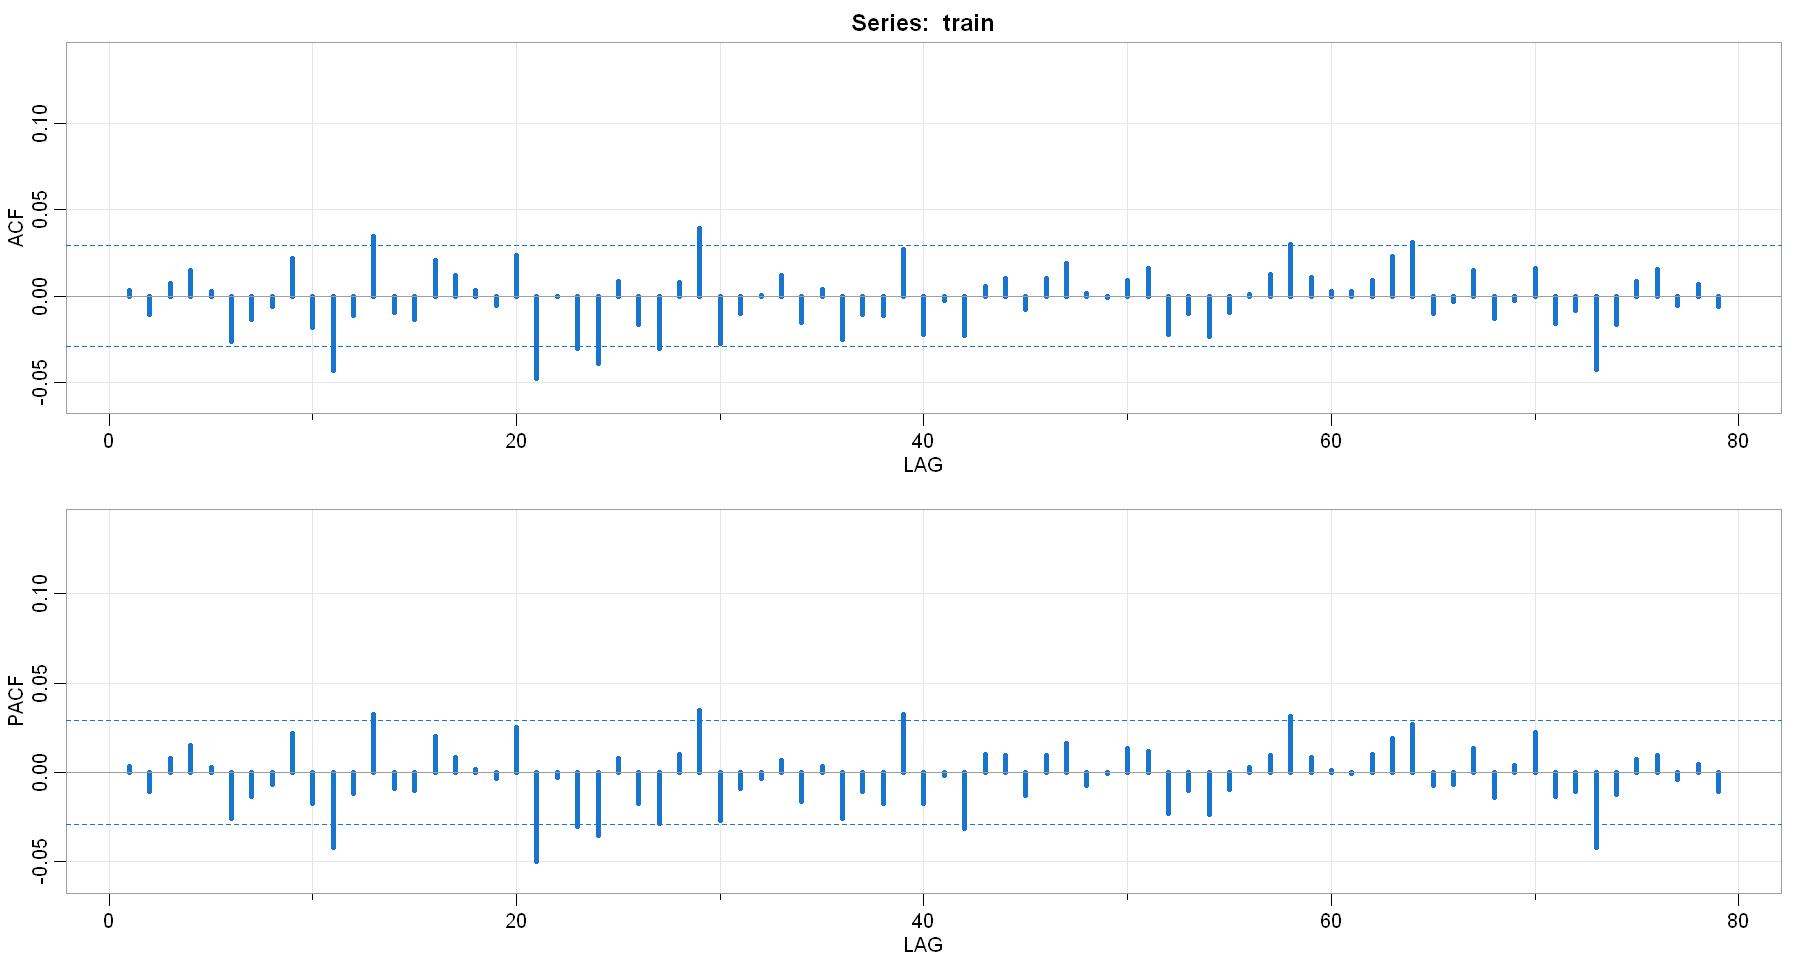

In [17]:
acf2(train, lwd=4, col=4)
#Media movil entendemos que no es
#Auto regresivo  puede tener muchos componentes

# Primer modelo AR

In [18]:
#Como diferenciamos una vez , el integrador lo dejamos en 1 (valor del medio)
#Segun el pacf
fit1 = Arima(train,order=c(10,0,10), include.mean=FALSE, include.drift = TRUE)
fit1


Series: train 
ARIMA(10,0,10) with drift 

Coefficients:
          ar1      ar2      ar3     ar4      ar5     ar6      ar7      ar8
      -0.2329  -0.5531  -0.4142  0.4326  -0.2302  0.0484  -0.4373  -0.7126
s.e.   0.1473   0.0787   0.0596  0.0683   0.1847  0.1114   0.0819   0.0774
          ar9     ar10     ma1     ma2     ma3      ma4     ma5      ma6
      -0.1496  -0.6760  0.2443  0.5417  0.4321  -0.4065  0.2329  -0.0561
s.e.   0.1501   0.0707  0.1423  0.0739  0.0479   0.0738  0.1710   0.1020
         ma7     ma8     ma9    ma10  drift
      0.4320  0.6906  0.1531  0.6824      0
s.e.  0.0884  0.0716  0.1325  0.0773      0

sigma^2 estimated as 0.0001159:  log likelihood=14762.37
AIC=-29480.75   AICc=-29480.53   BIC=-29338.54

In [19]:
aic_fit1 = fit1$aic
bic_fit1 = fit1$bic
sigma2_fit1 = fit1$sigma2

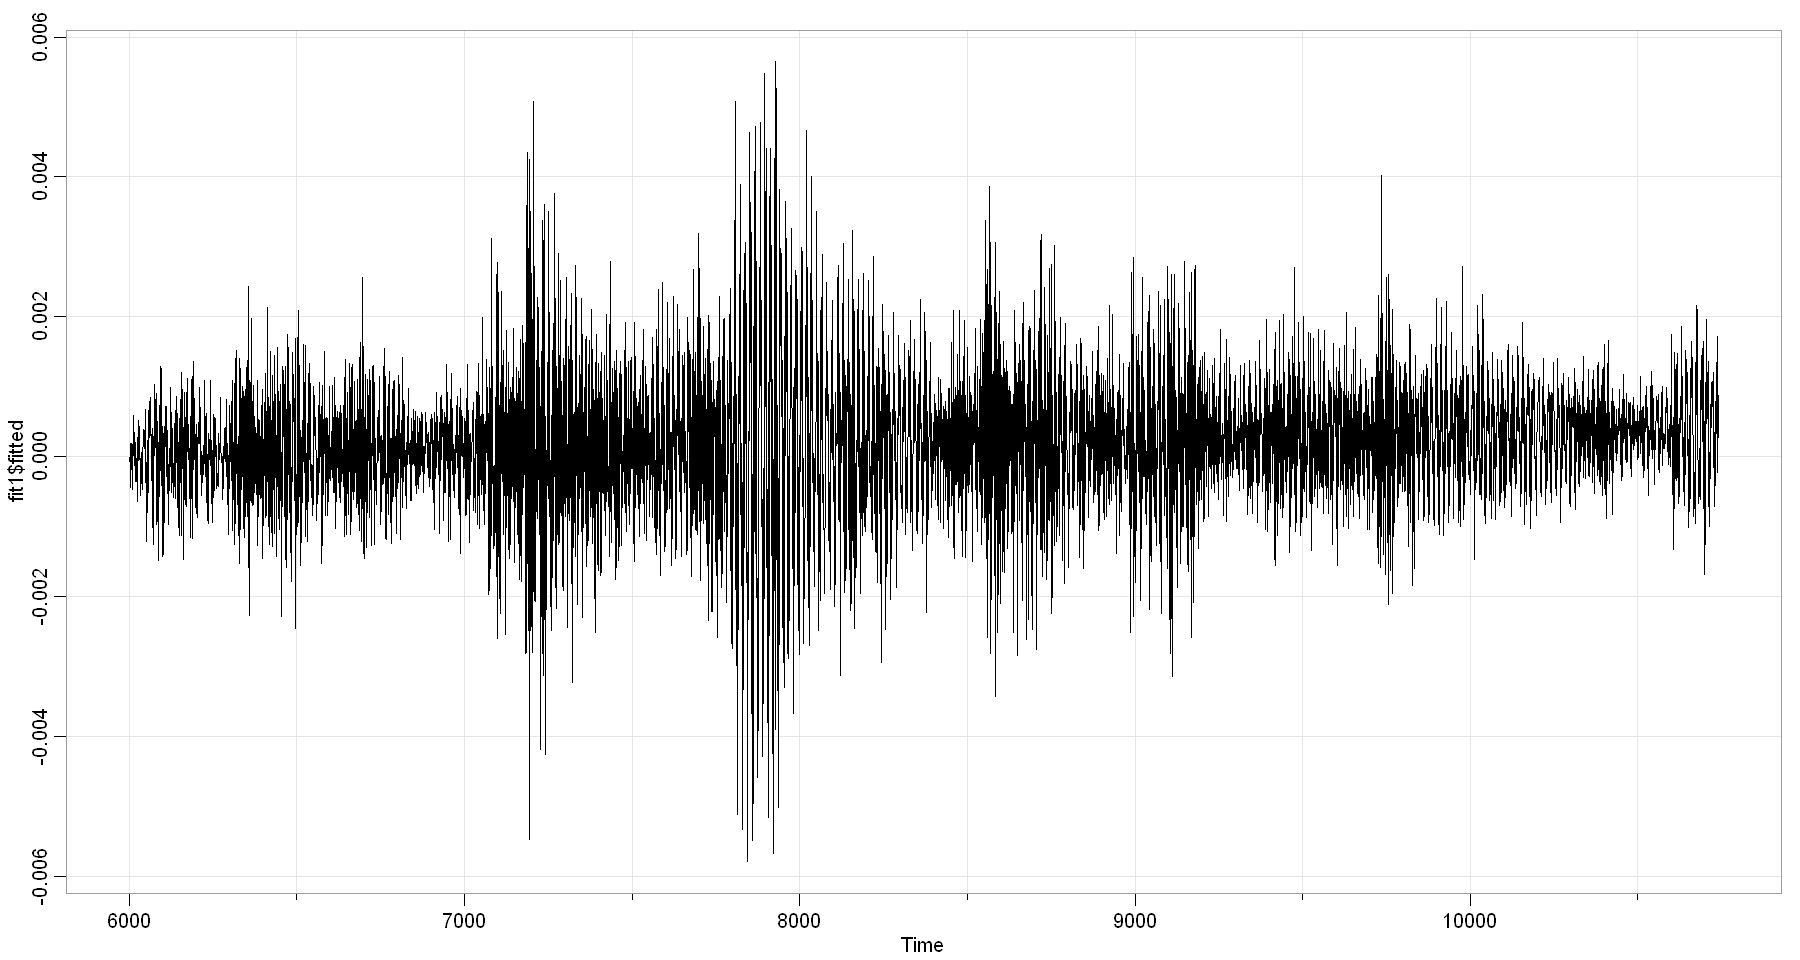

In [20]:
tsplot(fit1$fitted)

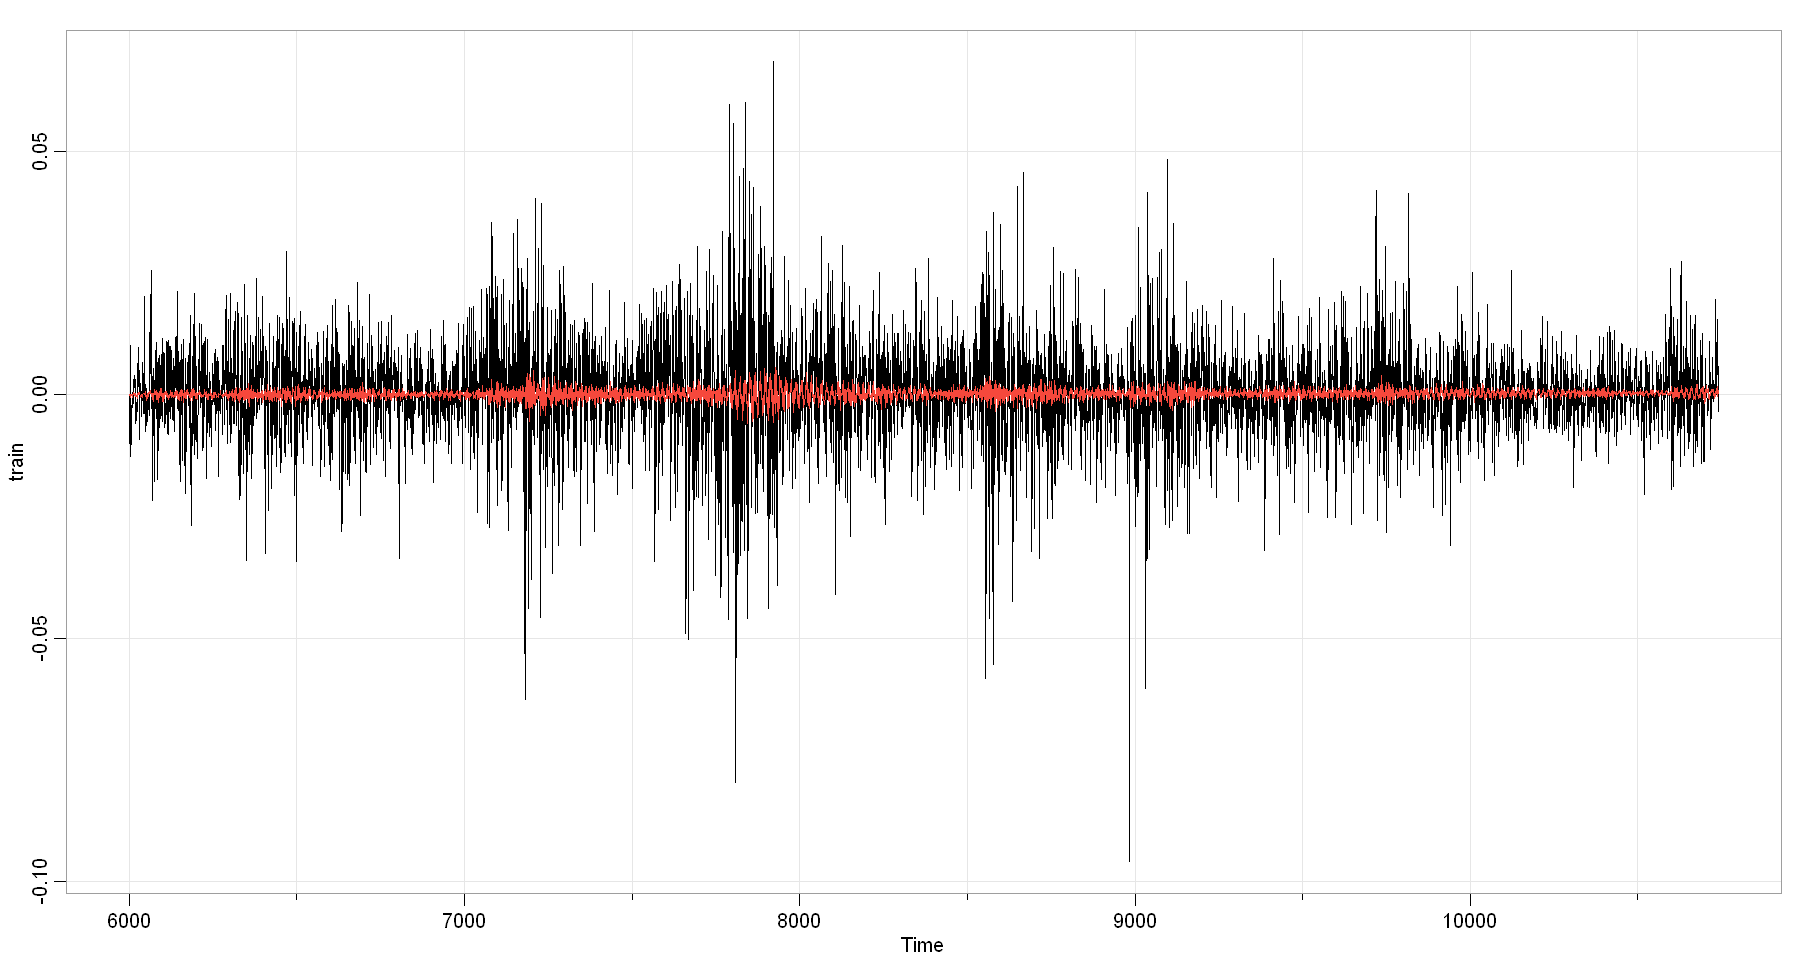

In [21]:
tsplot(train)
lines(fit1$fitted, col= 2)


	Ljung-Box test

data:  Residuals from ARIMA(10,0,10) with drift
Q* = 22.114, df = 3, p-value = 6.176e-05

Model df: 21.   Total lags used: 24



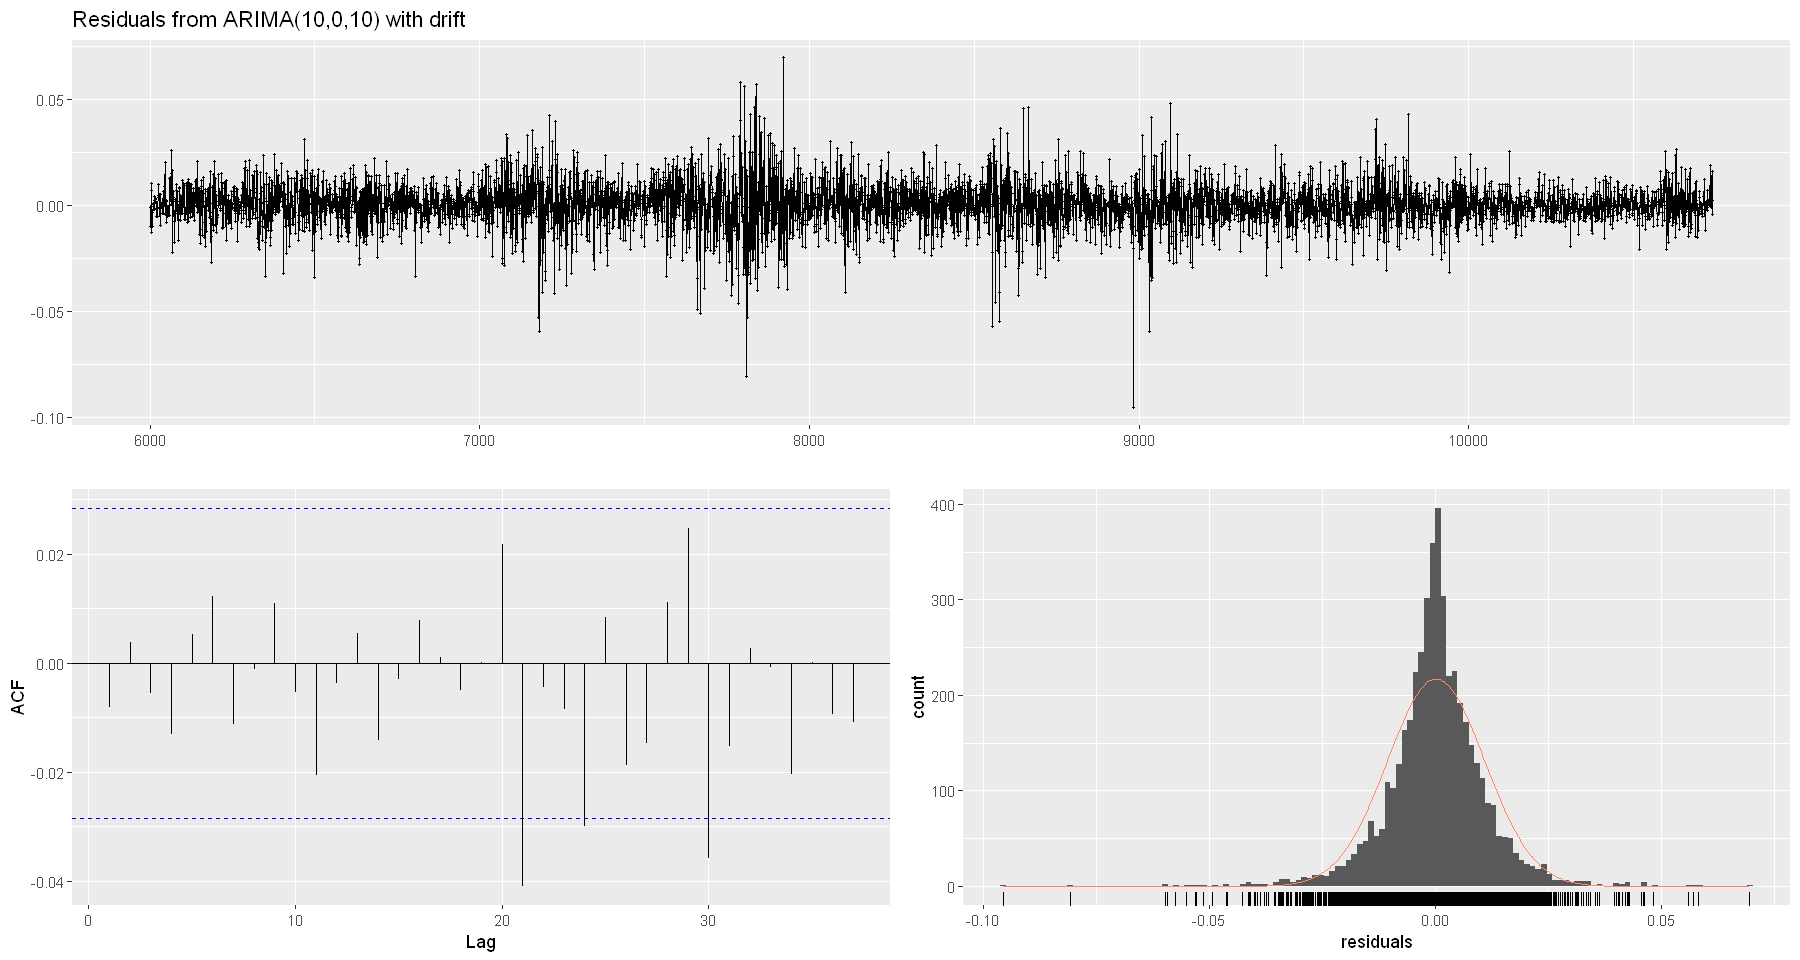

In [22]:
checkresiduals(fit1)

## Segundo modelo ARIMA

In [23]:
#Comprueba que coeficientes de arima van bien con nuestros datos
auto.arima(train)
#VER DE DEJARLO

Series: train 
ARIMA(0,0,0) with non-zero mean 

Coefficients:
       mean
      4e-04
s.e.  2e-04

sigma^2 estimated as 0.0001165:  log likelihood=14741.24
AIC=-29478.47   AICc=-29478.47   BIC=-29465.54

In [24]:
#Probamos otros modelos arima con menos parametros
fit2 = Arima(train,order=c(5,0,2), include.mean=FALSE, include.drift = TRUE)
fit2


Series: train 
ARIMA(5,0,2) with drift 

Coefficients:
          ar1      ar2     ar3      ar4     ar5     ma1     ma2  drift
      -0.0844  -0.9483  0.0114  -0.0042  0.0263  0.0885  0.9415      0
s.e.   0.0287   0.0504  0.0201   0.0150  0.0162  0.0249  0.0484      0

sigma^2 estimated as 0.0001164:  log likelihood=14747.17
AIC=-29476.34   AICc=-29476.3   BIC=-29418.16

In [25]:
aic_fit2 = fit2$aic
bic_fit2 = fit2$bic
sigma2_fit2 = fit2$sigma2

In [26]:
aic_fit1
aic_fit2

[1] -29480.75

[1] -29476.34

In [27]:
bic_fit1
bic_fit2

[1] -29338.54

[1] -29418.16

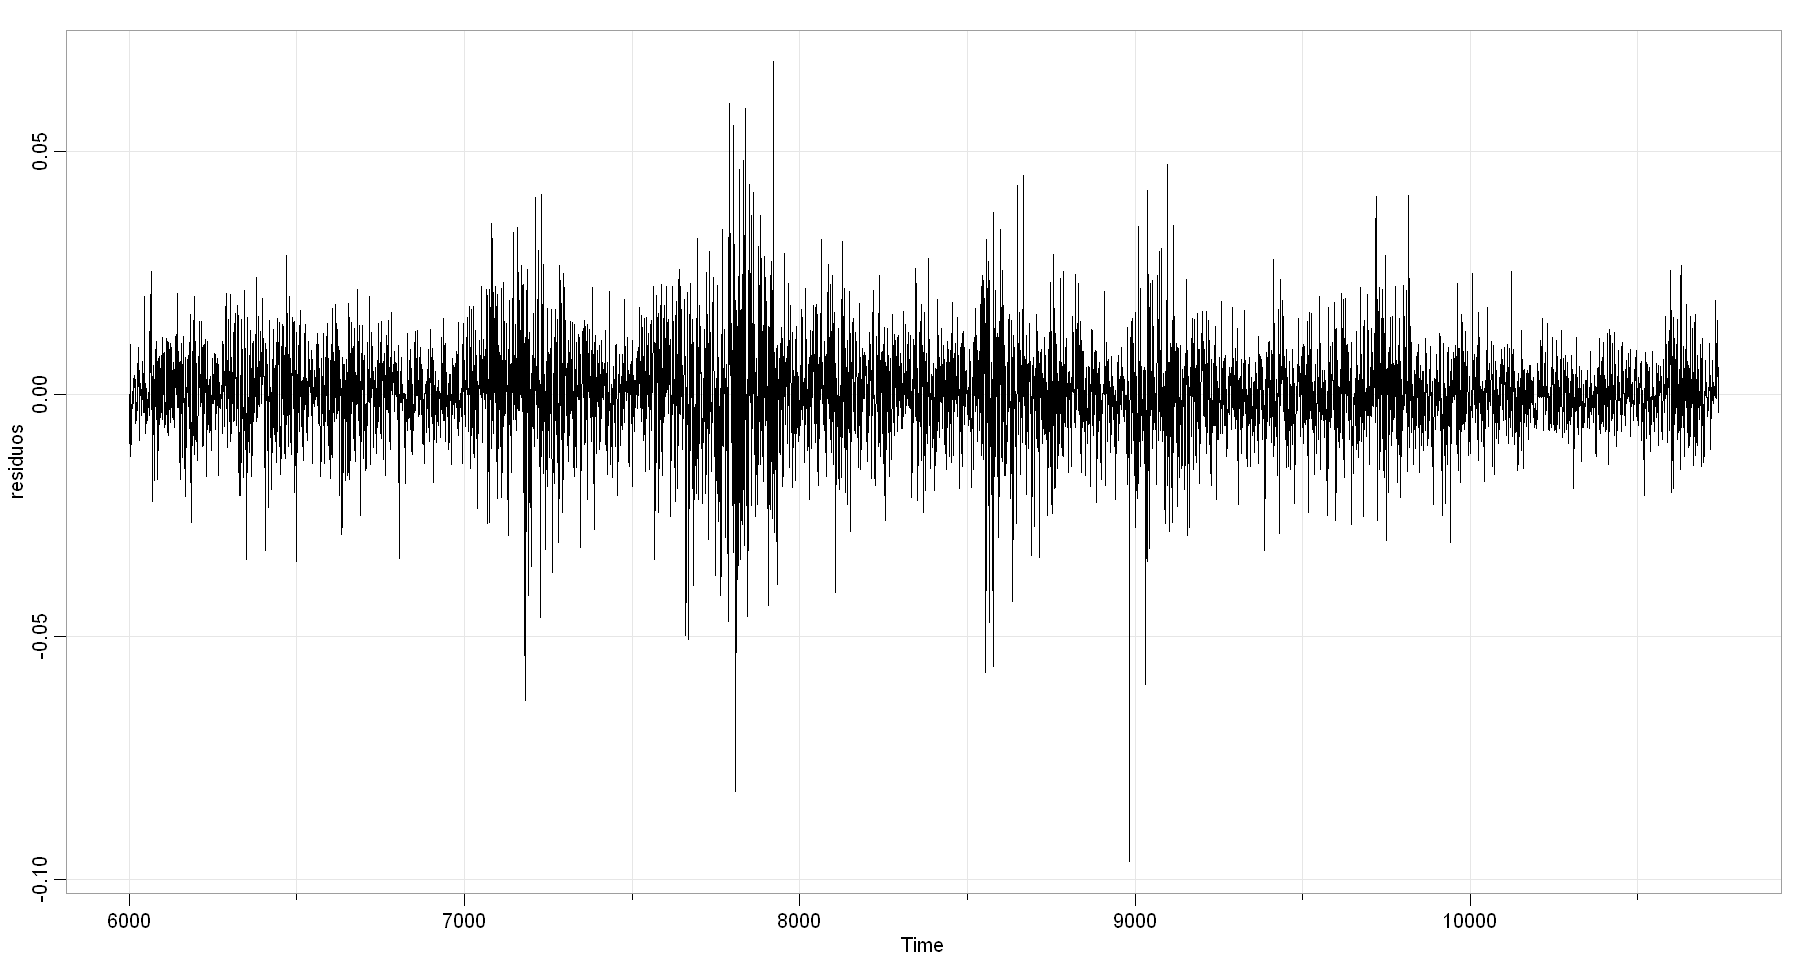

In [28]:
residuos = fit2$residuals
tsplot(residuos)
#Vemos como los residuos tienen alta volatilidad

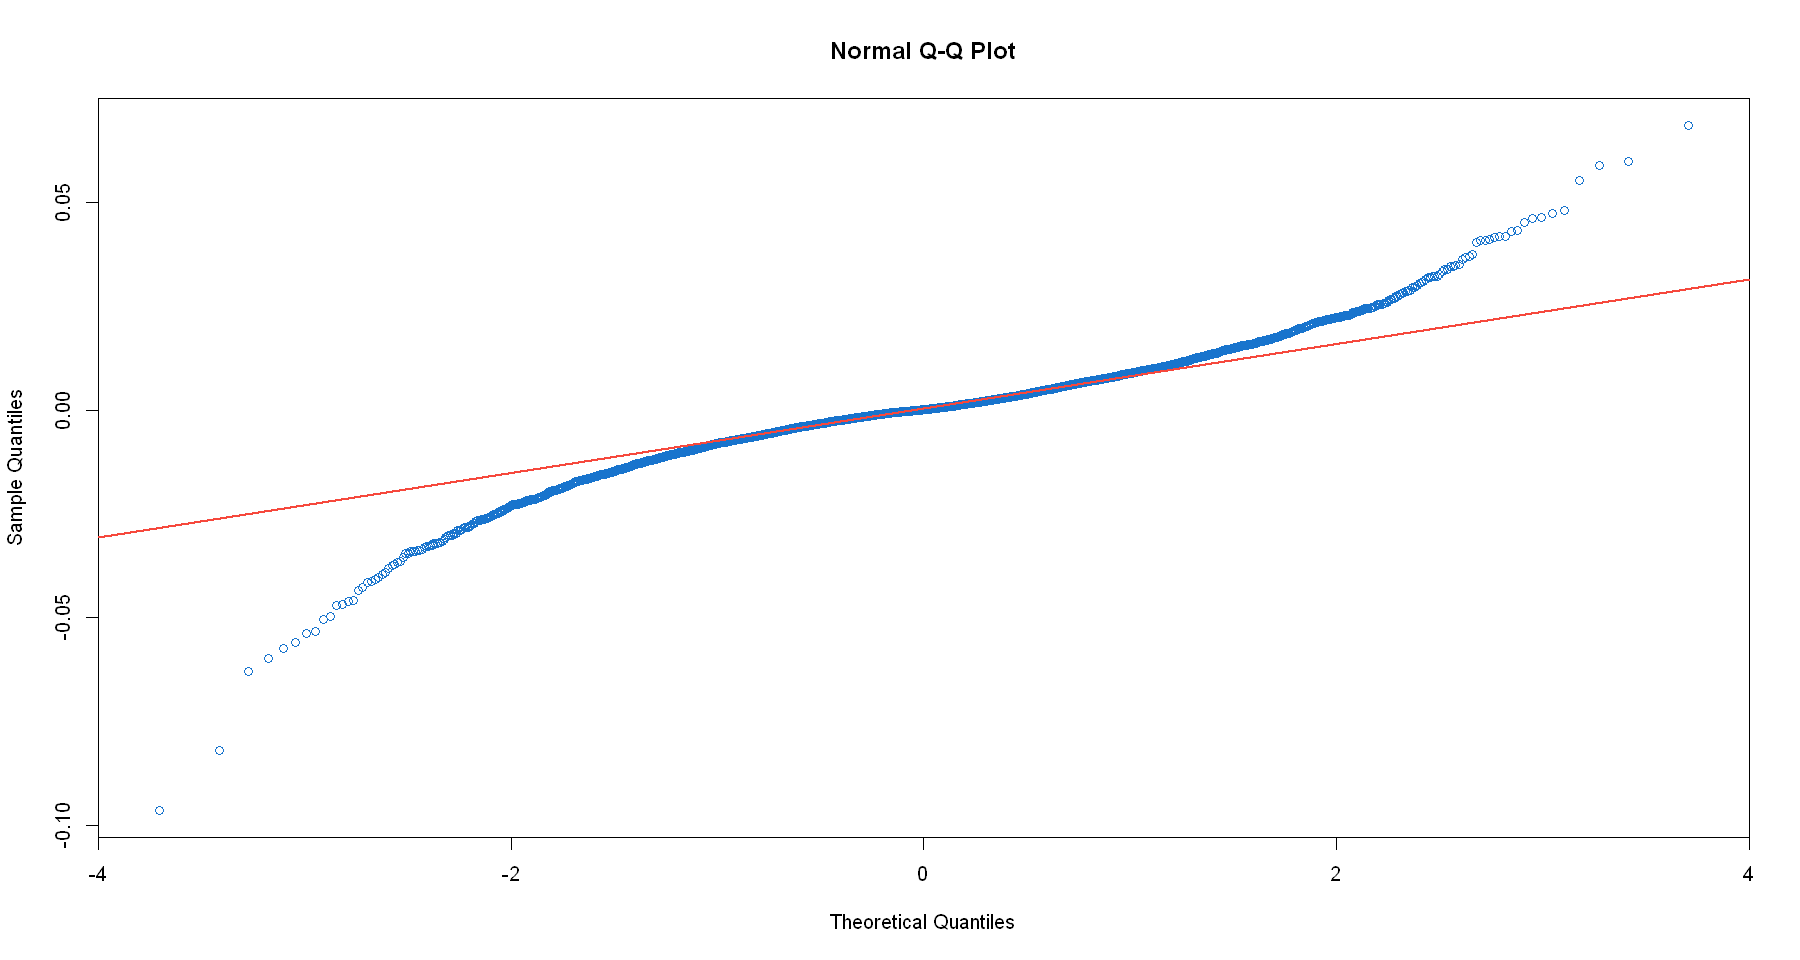

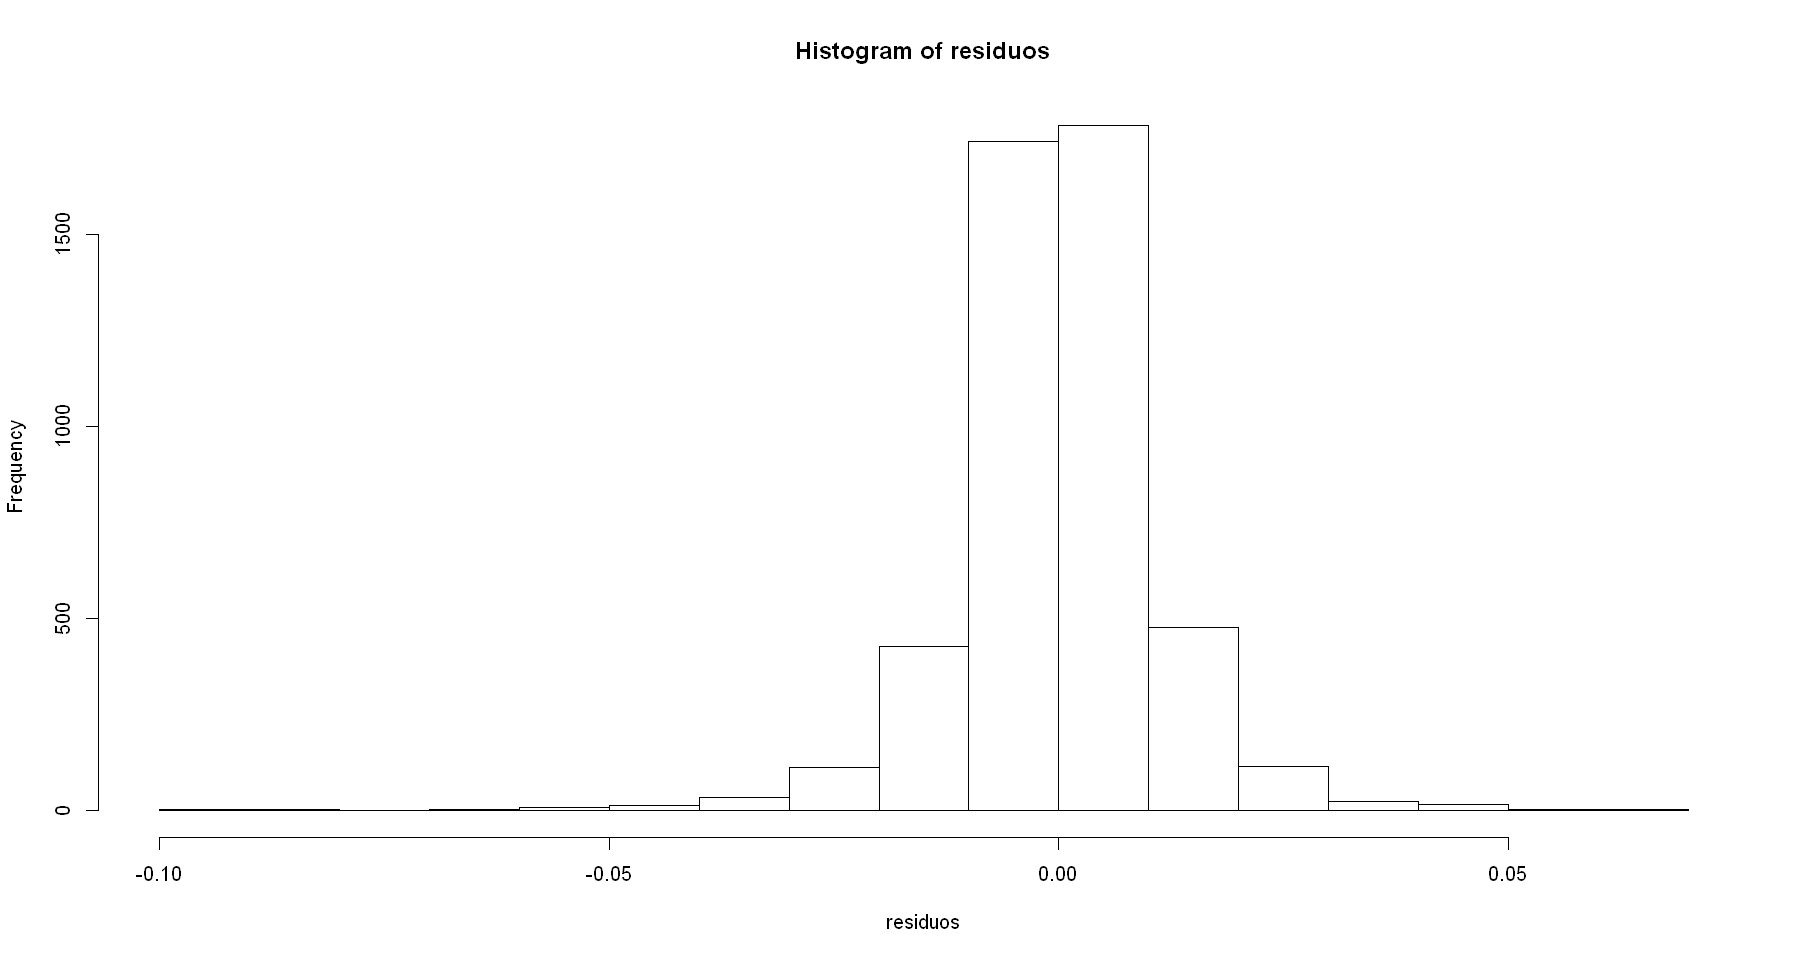

In [29]:
qqnorm(residuos, col=4)
qqline(residuos, col=2, lwd=2)
hist(residuos)

Vemos como en la gráfica Q-Q de nuestros residuos se muestra una vista asimétrica de las colas de distribución; La cola izquierda y derecha de la distribución son mucho más desviadas de lo que sugiere la distribución gaussiana.

Podemos observar el mismo efecto viendo el histograma.

ACF,0,0,0,0.01,-0.01,-0.02,0,-0.01,0.01,-0.01,...,0.02,-0.02,-0.01,-0.04,-0.01,0.00,0.02,0,0.01,-0.01
PACF,0,0,0,0.01,-0.01,-0.02,0,-0.01,0.01,-0.01,...,0.02,-0.02,-0.01,-0.04,-0.01,0.01,0.01,0,0.00,-0.01


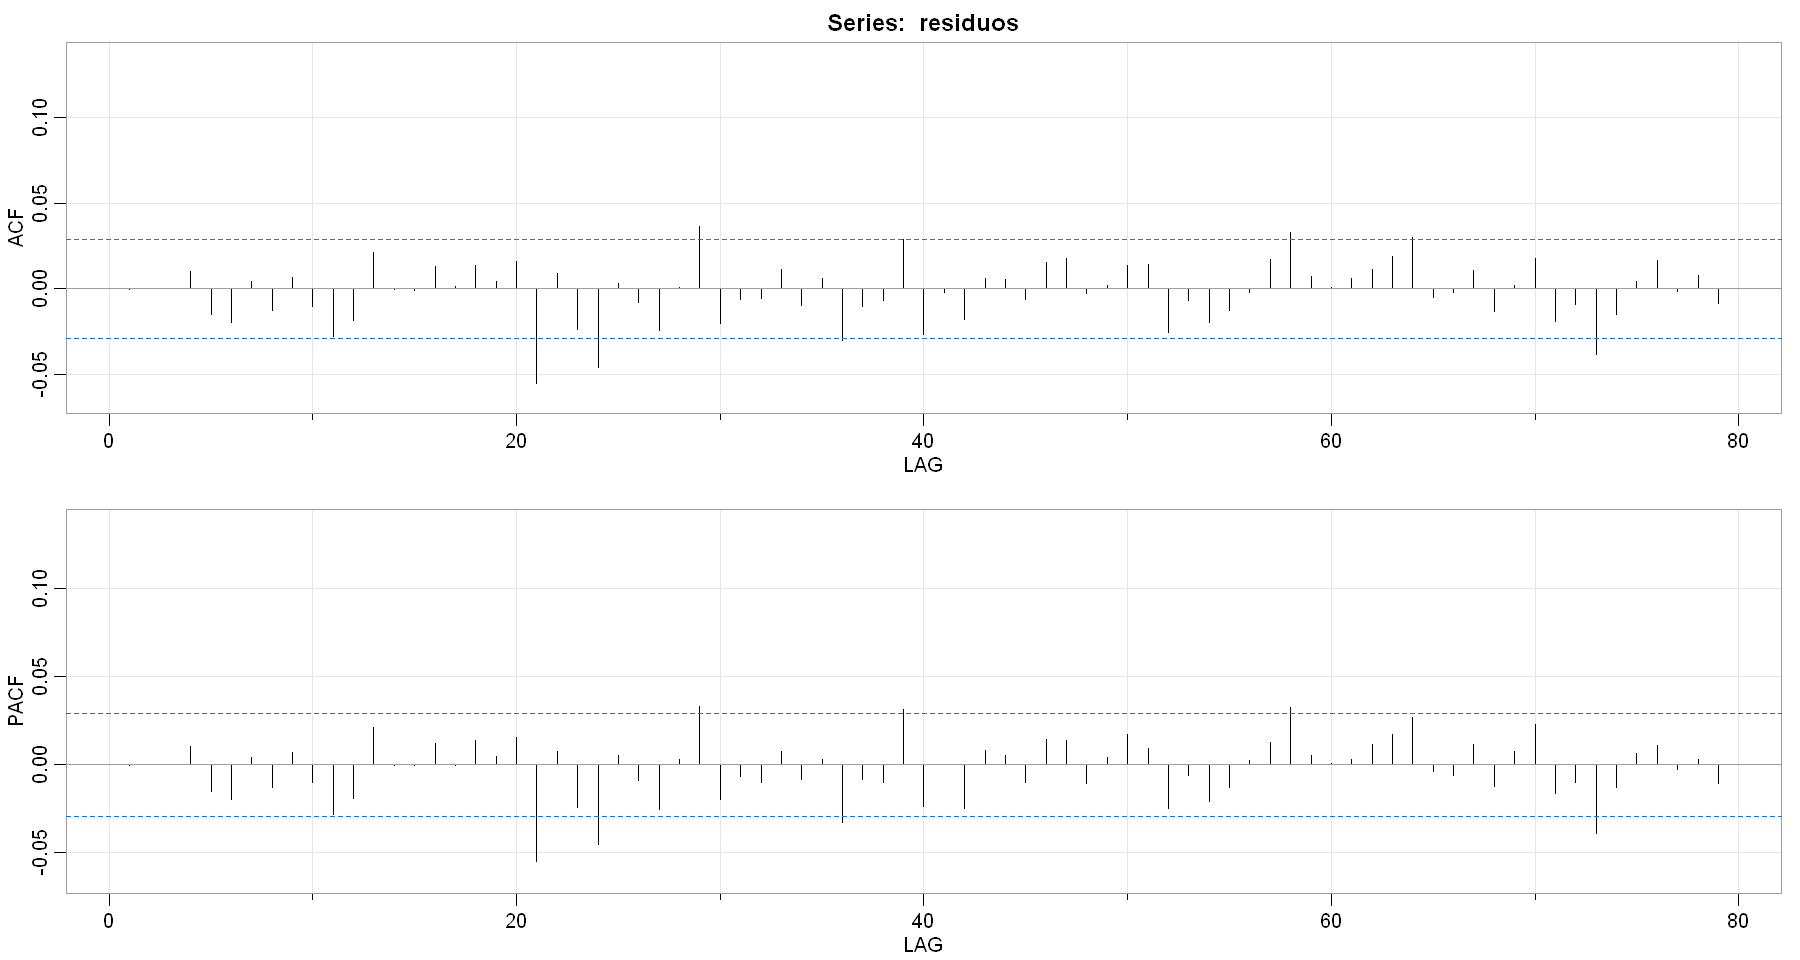

In [30]:
acf2(residuos)

Uno de los supuestos para la aplicacion de ARIMA es que se cumpla que el resultado sea ruido blanco y que la media y la varianza de los residuos sean constantes por lo que podemos ver por los plots estas no lo son.

Debido a esto es que podemos pensar en la aplicacion de modelo ARCH o GARCH. Vamos a confirmarlo a travez de un ARCH test.

Para saber si los residuos tienen alta varianza vamos a aplicar una prueba ARCH (ARCH test).

FALTA ESCRIBIR LA HIPOTESIS NULA

La prueba de efecto ARCH es una prueba de ruido blanco para la serie de tiempo al cuadrado, en nuestro caso serian los residuos al cuadrado. Lo que en otras palabras es la investigacion de un orden superior no lineal de autocorrelacion.

Por ende una prueba ARCH significativa nos indica una volatilidad variable en el tiempo.



In [31]:
#Hacemos teste de aplicacion de arch
archtest = archtest(ts = as.vector(residuos))
archtest


	Engle's LM ARCH Test

data:  as.vector(residuos)
statistic = 36.531, lag = 1, p-value = 1.503e-09
alternative hypothesis: ARCH effects of order 1 are present


In [32]:
#Hacemos teste de aplicacion de archnde orden 2
archtest = archtest(ts = as.vector(residuos),lag = 2)
archtest


	Engle's LM ARCH Test

data:  as.vector(residuos)
statistic = 73.215, lag = 2, p-value < 2.2e-16
alternative hypothesis: ARCH effects of order 2 are present


In [33]:
#Hacemos teste de aplicacion de archnde orden 3
archtest = archtest(ts = as.vector(residuos),lag = 3)
archtest
#no entiendo le sigo aumentando cada vez mas lags y en todas nos dice que hay efectos arch de orden altisimo como el siguiente
#Quizas conviene usar el ArchTest que usa ella en el video. Quizas cambia como vas viendo los lags, para mi aunque le pongas muchos lags la respuesta es la misma y te das cuentapor el p-value que nunca cambia aunque le crezcas el orden.


	Engle's LM ARCH Test

data:  as.vector(residuos)
statistic = 139.58, lag = 3, p-value < 2.2e-16
alternative hypothesis: ARCH effects of order 3 are present


In [34]:
#Hacemos teste de aplicacion de archnde orden 1000
archtest = archtest(ts = as.vector(train),lag = 100)
archtest


	Engle's LM ARCH Test

data:  as.vector(train)
statistic = 605.81, lag = 100, p-value < 2.2e-16
alternative hypothesis: ARCH effects of order 100 are present


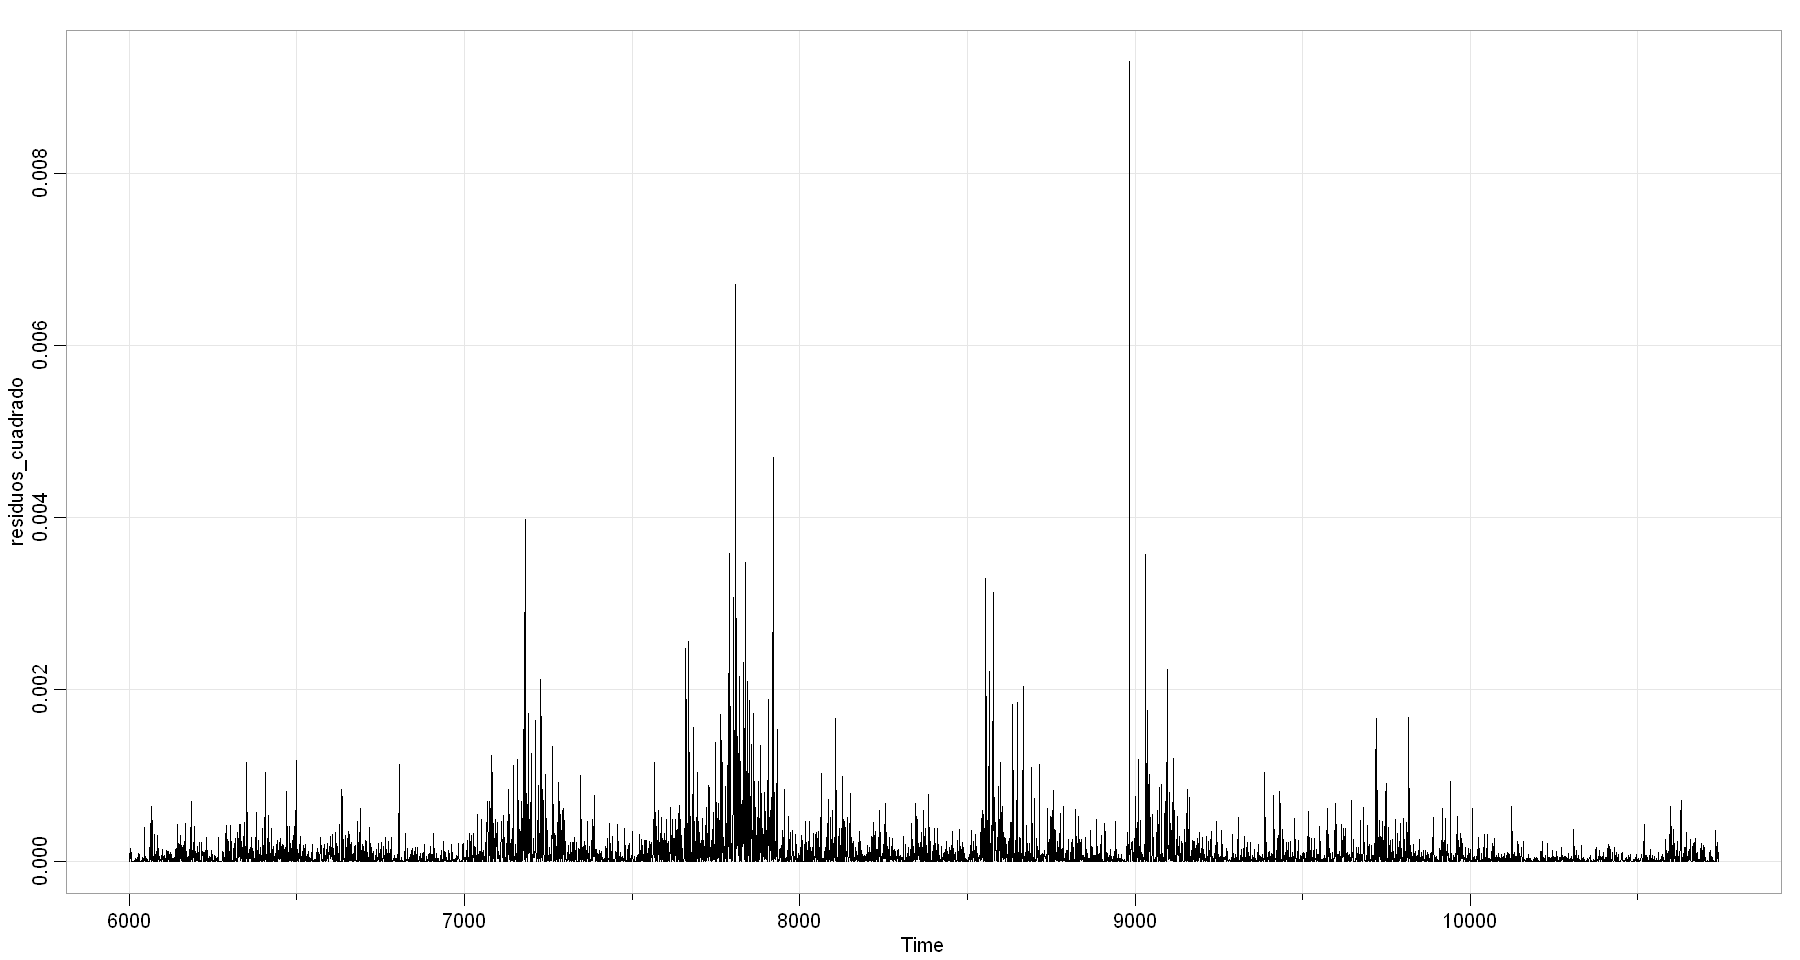

In [35]:
#Siguiendo el video de abajo para hacer el archtest a mano. Esto es para saber el orden del ARCH
# https://www.youtube.com/watch?v=DEjp1y-Gnjo
residuos_cuadrado = residuos^2
tsplot(residuos_cuadrado)
#Se muestra como hay varianza heterosedastica por que es muy variable en el tiempo.

In [36]:
res_arch <- dynlm (residuos_cuadrado ~ L(residuos_cuadrado)) 
summary(res_arch)
#Vemos que nos da lo mismo que el ARCH test!!! nos esta explicando como hace el ARCH test para llegar a su info. Esto te dice que tenes que aplicar ARCH de orden uno.


Time series regression with "ts" data:
Start = 6002, End = 10740

Call:
dynlm(formula = residuos_cuadrado ~ L(residuos_cuadrado))

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0008101 -0.0001057 -0.0000850 -0.0000108  0.0091496 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.060e-04  4.915e-06  21.573  < 2e-16 ***
L(residuos_cuadrado) 8.753e-02  1.447e-02   6.048 1.58e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0003179 on 4737 degrees of freedom
Multiple R-squared:  0.007662,	Adjusted R-squared:  0.007452 
F-statistic: 36.57 on 1 and 4737 DF,  p-value: 1.582e-09


In [37]:
ArchTest <- ArchTest (train, lags=1000, demean = TRUE)
ArchTest
#En el 5000 p-value es 1


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  train
Chi-squared = 1145.6, df = 1000, p-value = 0.0008917


# Analisis de varianza

[1] 0.01079364

[1] 0.0001165026

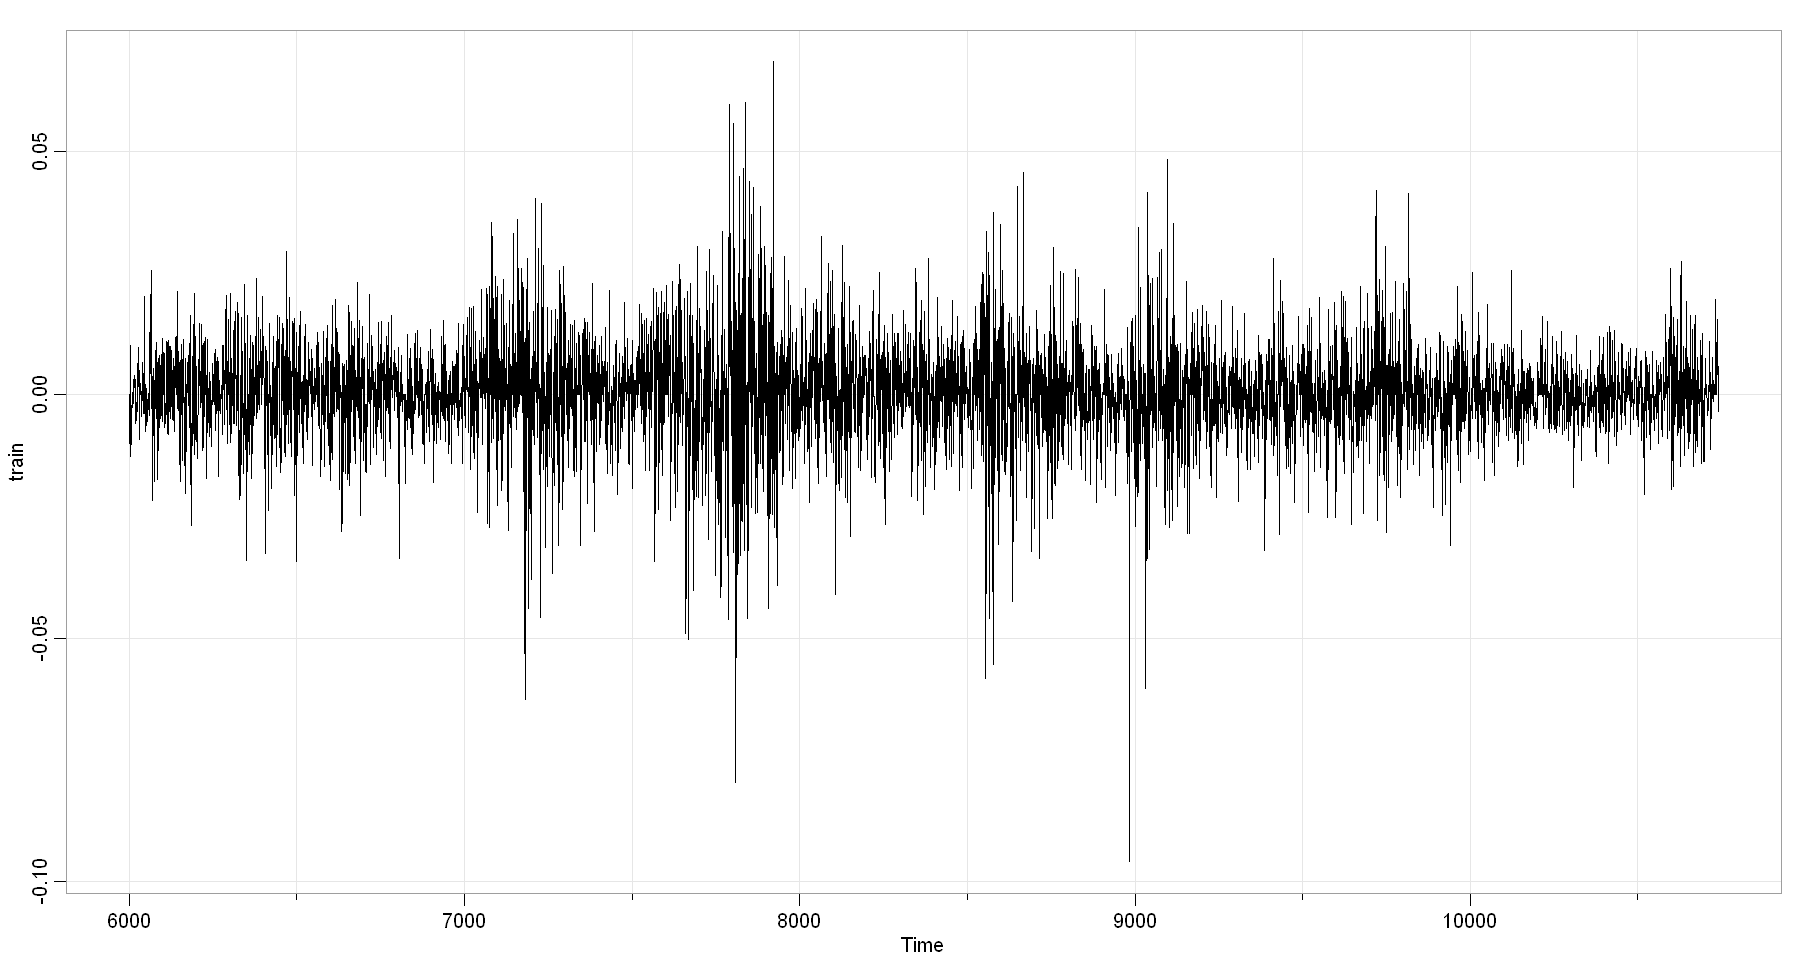

In [38]:
sd(train)
var(train)
tsplot(train)

In [39]:
vent<- 50
vent2<- vent-1


varianza=c()
for(i in vent:length(train))
    {f=var(train[(i-vent2):i])
    varianza[i]=(f)}



In [40]:
#varianza

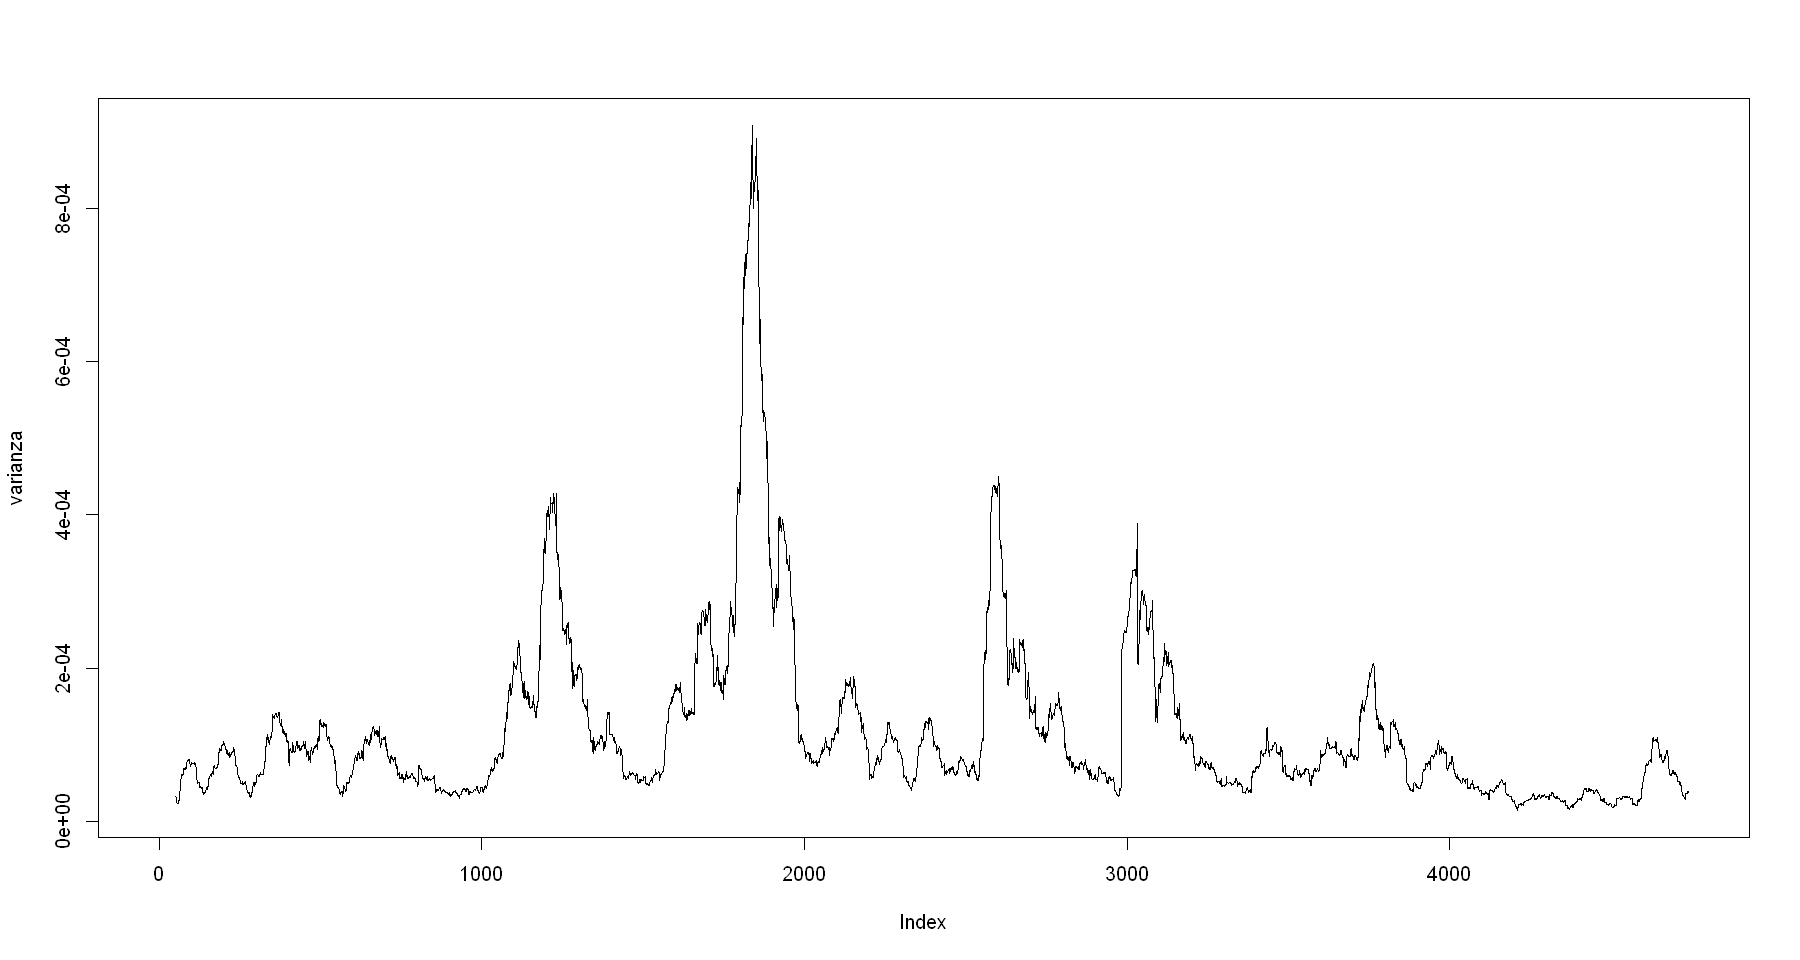

In [41]:
plot(varianza,type="l")

Se puede observar como mirando en distintas ventanas de tiempo la varianza no es constante.

In [42]:
y<-train

In [43]:
STDM=c()
for(i in vent:length(y))
    {f=sd(y[(i-vent2):i])
    STDM[i]=(f)}
#STDM
STDM2<-STDM*2

In [44]:
MM=c()
for(i in vent:length(y))
    {f=mean(y[(i-vent2):i])
    MM[i]=(f)}
#MM

In [45]:
#desviacion típica

#sd(na.omit(y))
#2*sd(na.omit(y))

sd1= MM + STDM
#sd1
sd11= MM-STDM
#sd11

In [46]:
sd2<-MM+STDM2
sd22<-MM-STDM2

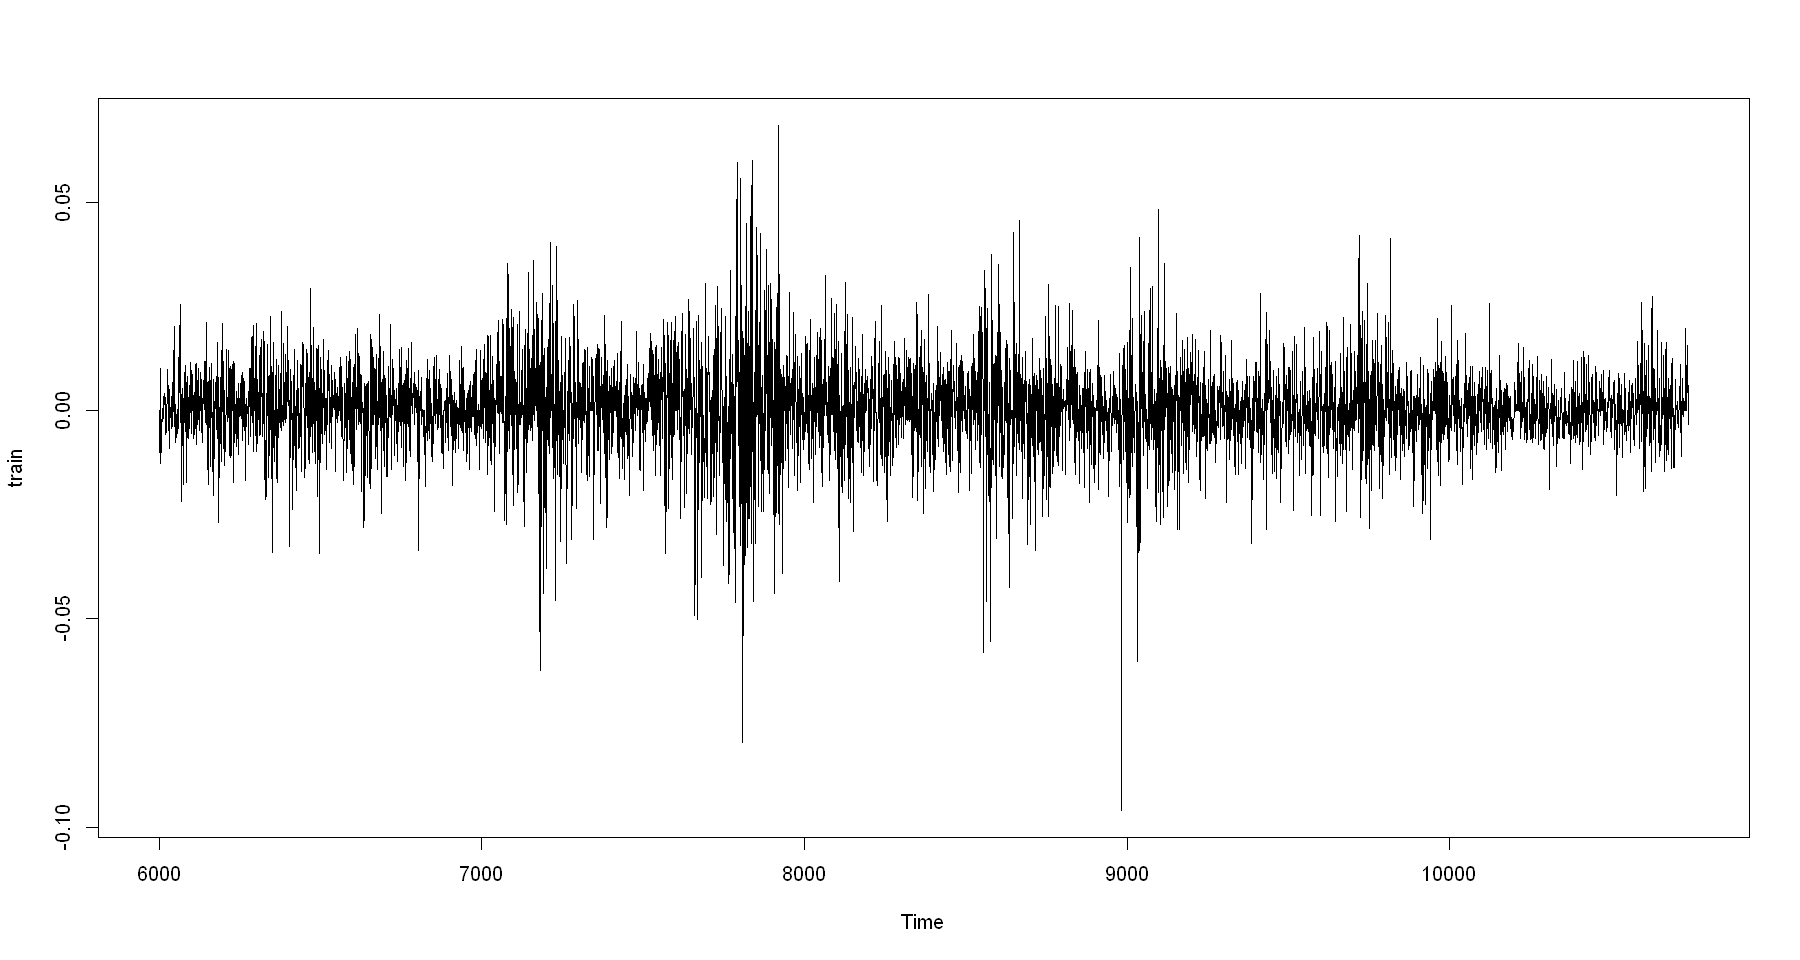

In [47]:
plot(train,type="l")
lines(MM, col="blue")
lines(sd11, col="green")
lines(sd1,col="green")
lines(sd2,col="red")
lines(sd22,col="red")

Se muestra como la varianza no es constante.

EXPLICAR COLORES DESPUES

In [48]:
#GARCH 
#Aplicar rugarch
#Duda: tenemos que usar los datos y modelar el garch en funcion de todos los datos o sobre el resiudo de arima
#gold_garch <- garchFit(formula = ~ arma(2,2) + garch(1,2),cond.dist="norm", data = (train),include.mean = FALSE, trace = FALSE)

In [49]:
#summary(gold_garch)

In [50]:
#tsplot(gold_garch@fitted)

In [51]:
#tsplot(train)
#lines(gold_garch@fitted,col=2,lwd = 3)
#lines(gold_garch@fitted+2*gold_garch@sigma.t ,col=5) #sigma.t = a numeric vector with the conditional standard deviation.
#lines(gold_garch@fitted-2*gold_garch@sigma.t ,col=5)

In [52]:
#vc <- gold_garch@h.t ## variación Condicional
#plot(vc,type="l")

In [53]:
#SD<-gold_garch@sigma.t # Desviación estándar condicional
#plot(SD,type="l")
#MediaSD<- mean(SD)
#abline( MediaSD,0,col="red")

In [54]:
#residuos2 <- gold_garch@residuals #residuos
#plot(residuos2,type="l")

In [55]:
### PREDICCIÓN CON GARCH


#fcst<-predict(gold_garch,n.ahead=10)
#fcst
#tsplot(test)
#lines(ts(fcst$meanForecast,start = 10751),col=2)
#lines(ts(fcst$meanForecast + 2*fcst$standardDeviation,start = 10751),col=3)
#lines(-ts(fcst$meanForecast + 2*fcst$standardDeviation,start = 10751),col=3)

## Deshacer transformacion para llevar a valores originales

In [56]:
#fcst_orig = cumsum(fcst)

In [57]:
#help(ugarchspec)

## Orden ARCH

In [58]:
gold_cuadrado = train^2

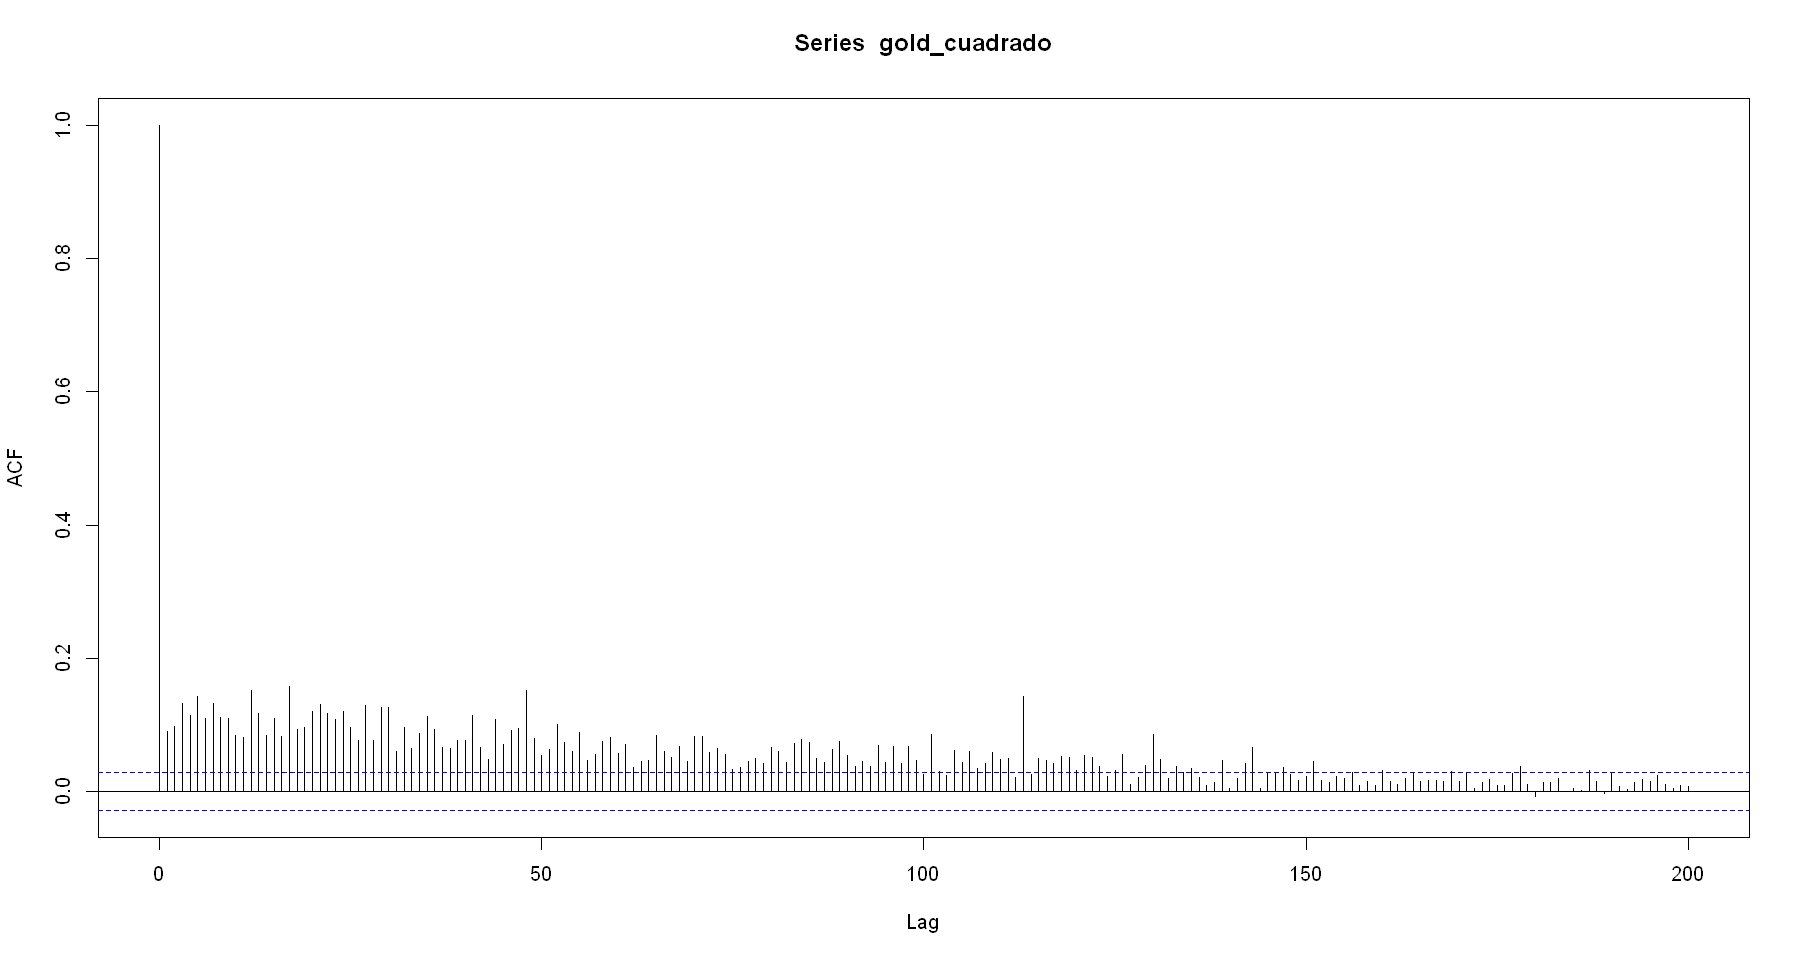

In [59]:
acf(gold_cuadrado,lag.max = 200)

# Prueba con rugarch

In [85]:
gold_garch12_spec <-  ugarchspec(variance.model = list(model="sGARCH",         #Other options are egarch, fgarch, etc.
                                                     garchOrder=c(50,50)), # You can modify the order GARCH(m,s) here
                               #mean.model = list(armaOrder=c(1,2)), #Specify your ARMA model implying your model should be stationary.
                               mean.model = list(armaOrder = c(1, 2), include.mean = TRUE, archm = FALSE, archpow = 1, arfima = FALSE, external.regressors = NULL, archex = FALSE),
                                distribution.model = "norm")         #Other distribution are "std" for t-distribution, and "ged" for General Error Distribution
gold_garch12 <- ugarchfit(spec=gold_garch12_spec, 
                              data=train)

In [86]:
gold_garch12


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(50,50)
Mean Model	: ARFIMA(1,0,2)
Distribution	: norm 

Optimal Parameters
------------------------------------
         Estimate  Std. Error     t value Pr(>|t|)
mu       0.000313    0.000096  3.2654e+00 0.001093
ar1      0.971015    0.003518  2.7599e+02 0.000000
ma1     -0.960789    0.000001 -7.4449e+05 0.000000
ma2     -0.015681    0.000216 -7.2754e+01 0.000000
omega    0.000010    0.000004  2.2886e+00 0.022102
alpha1   0.024163    0.009354  2.5831e+00 0.009791
alpha2   0.010643    0.007564  1.4070e+00 0.159422
alpha3   0.045576    0.007102  6.4169e+00 0.000000
alpha4   0.058358    0.015393  3.7912e+00 0.000150
alpha5   0.015315    0.008526  1.7962e+00 0.072458
alpha6   0.028473    0.012509  2.2762e+00 0.022832
alpha7   0.075817    0.016912  4.4831e+00 0.000007
alpha8   0.014098    0.018

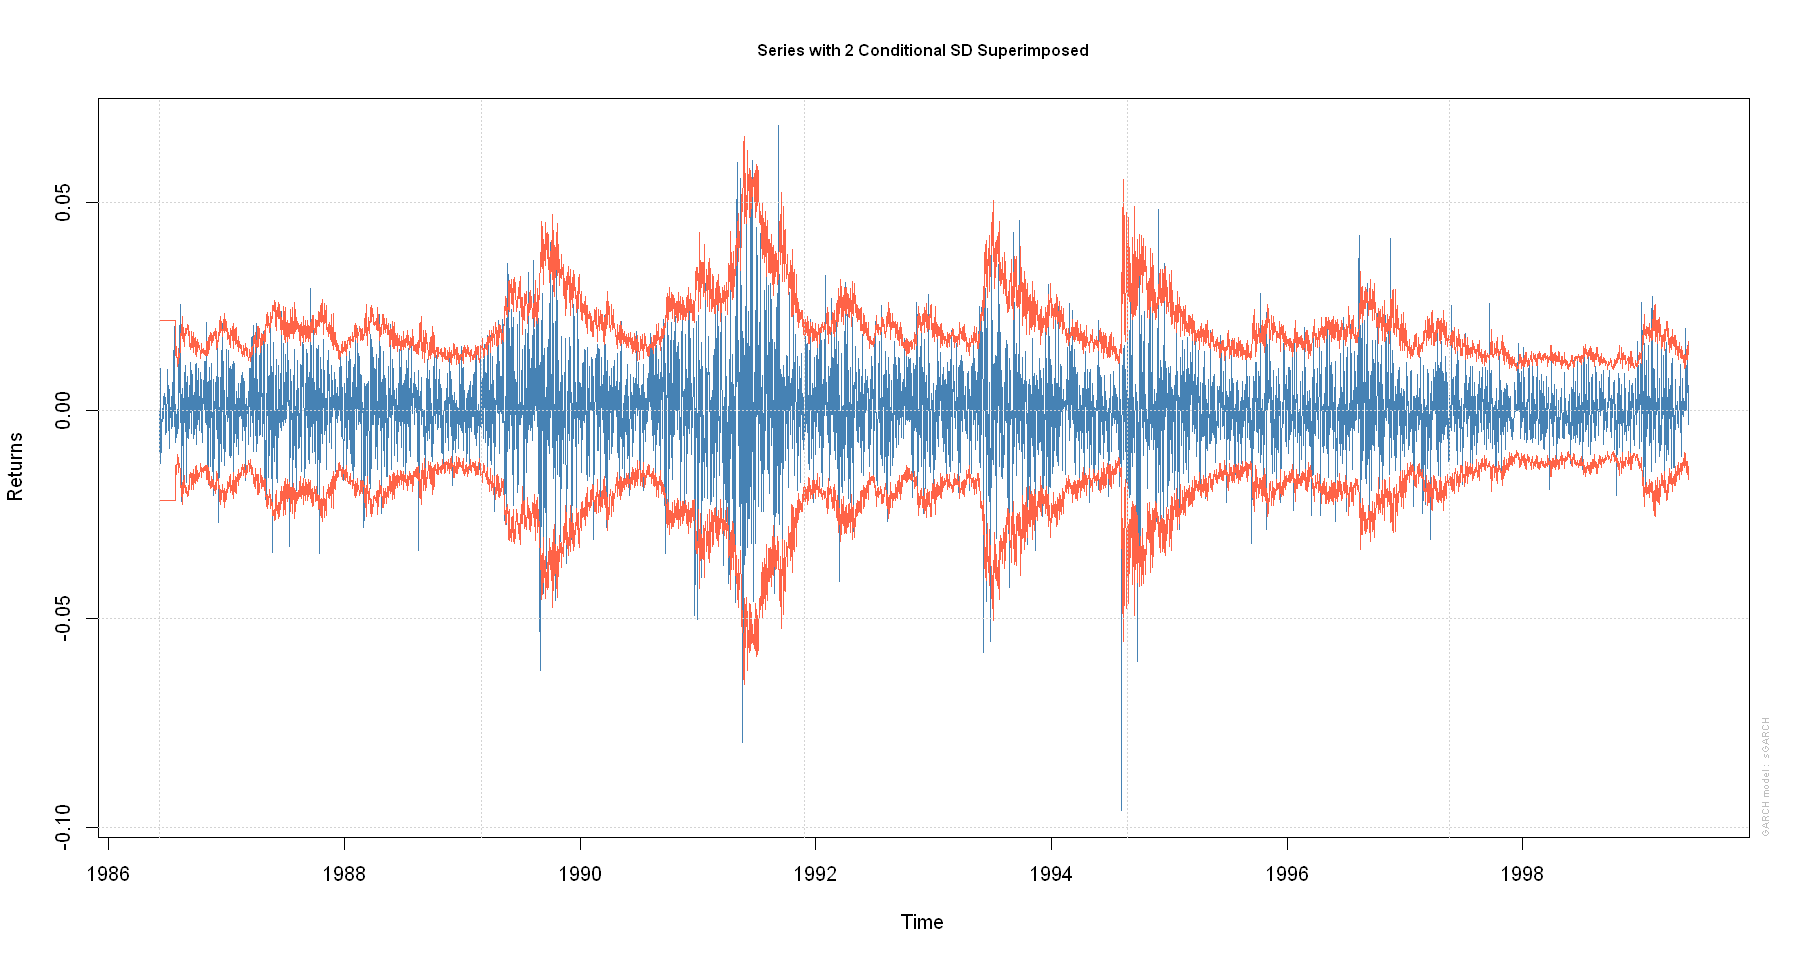

In [87]:
plot(gold_garch12, which = 1) 


please wait...calculating quantiles...


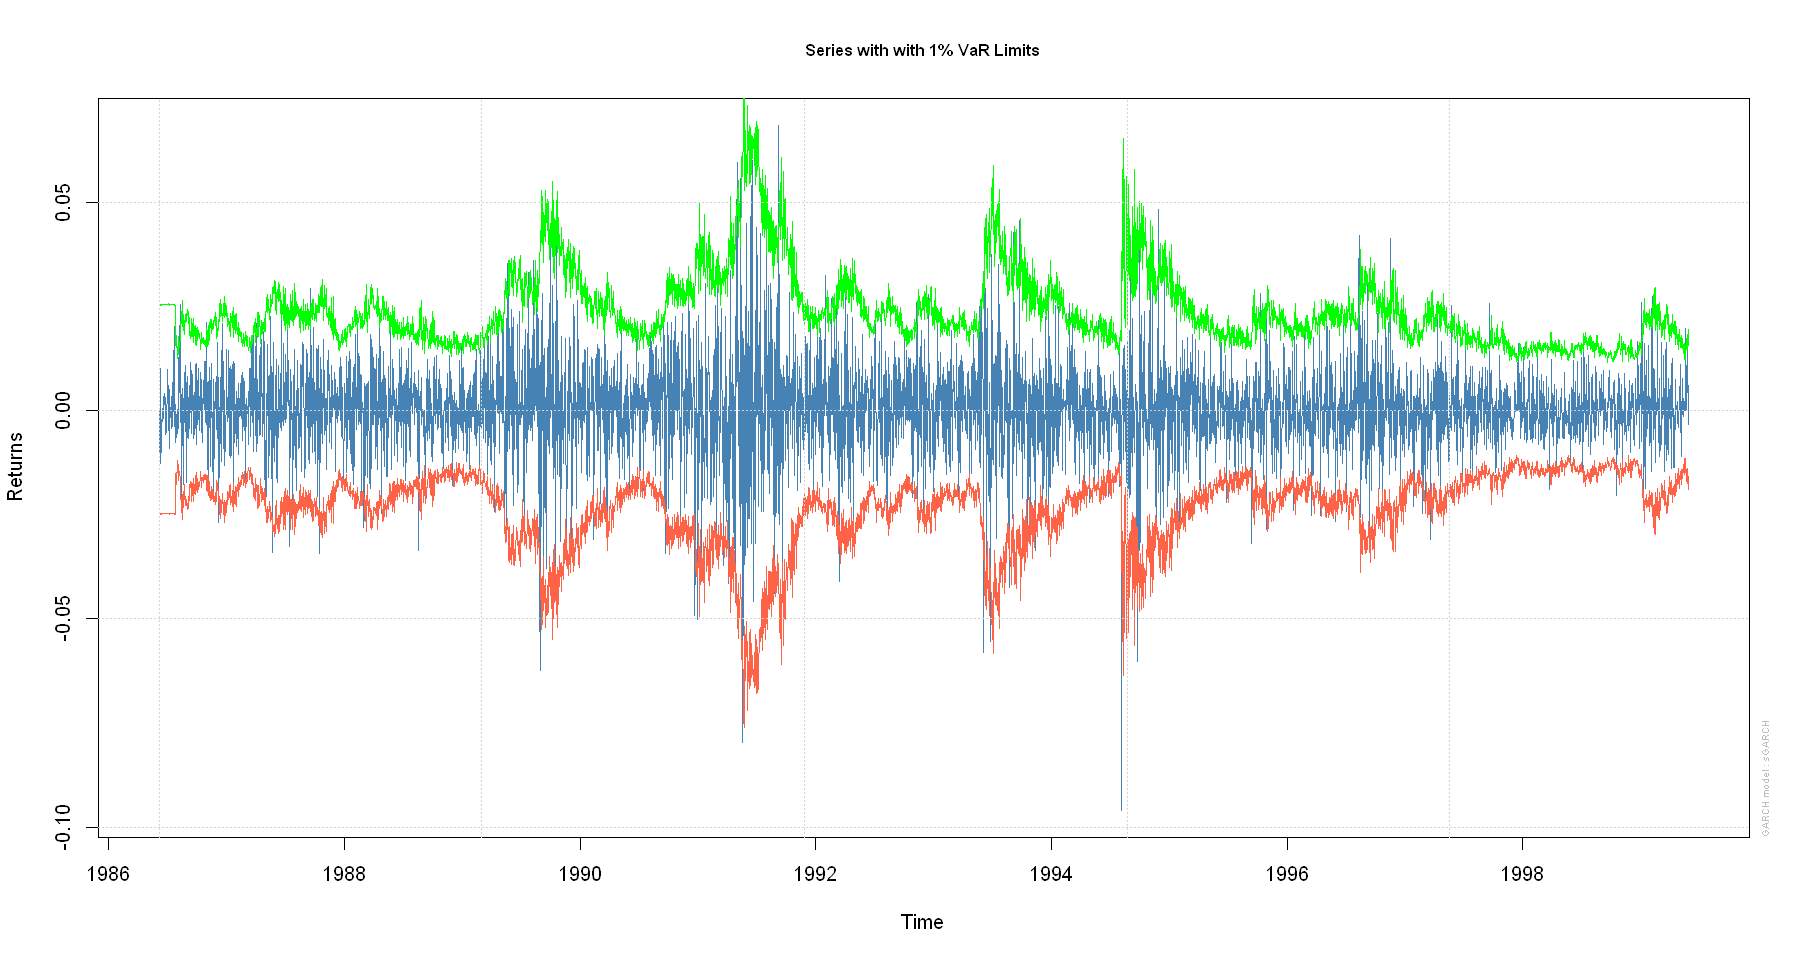

In [88]:
plot(gold_garch12, which = 2) 


please wait...calculating quantiles...


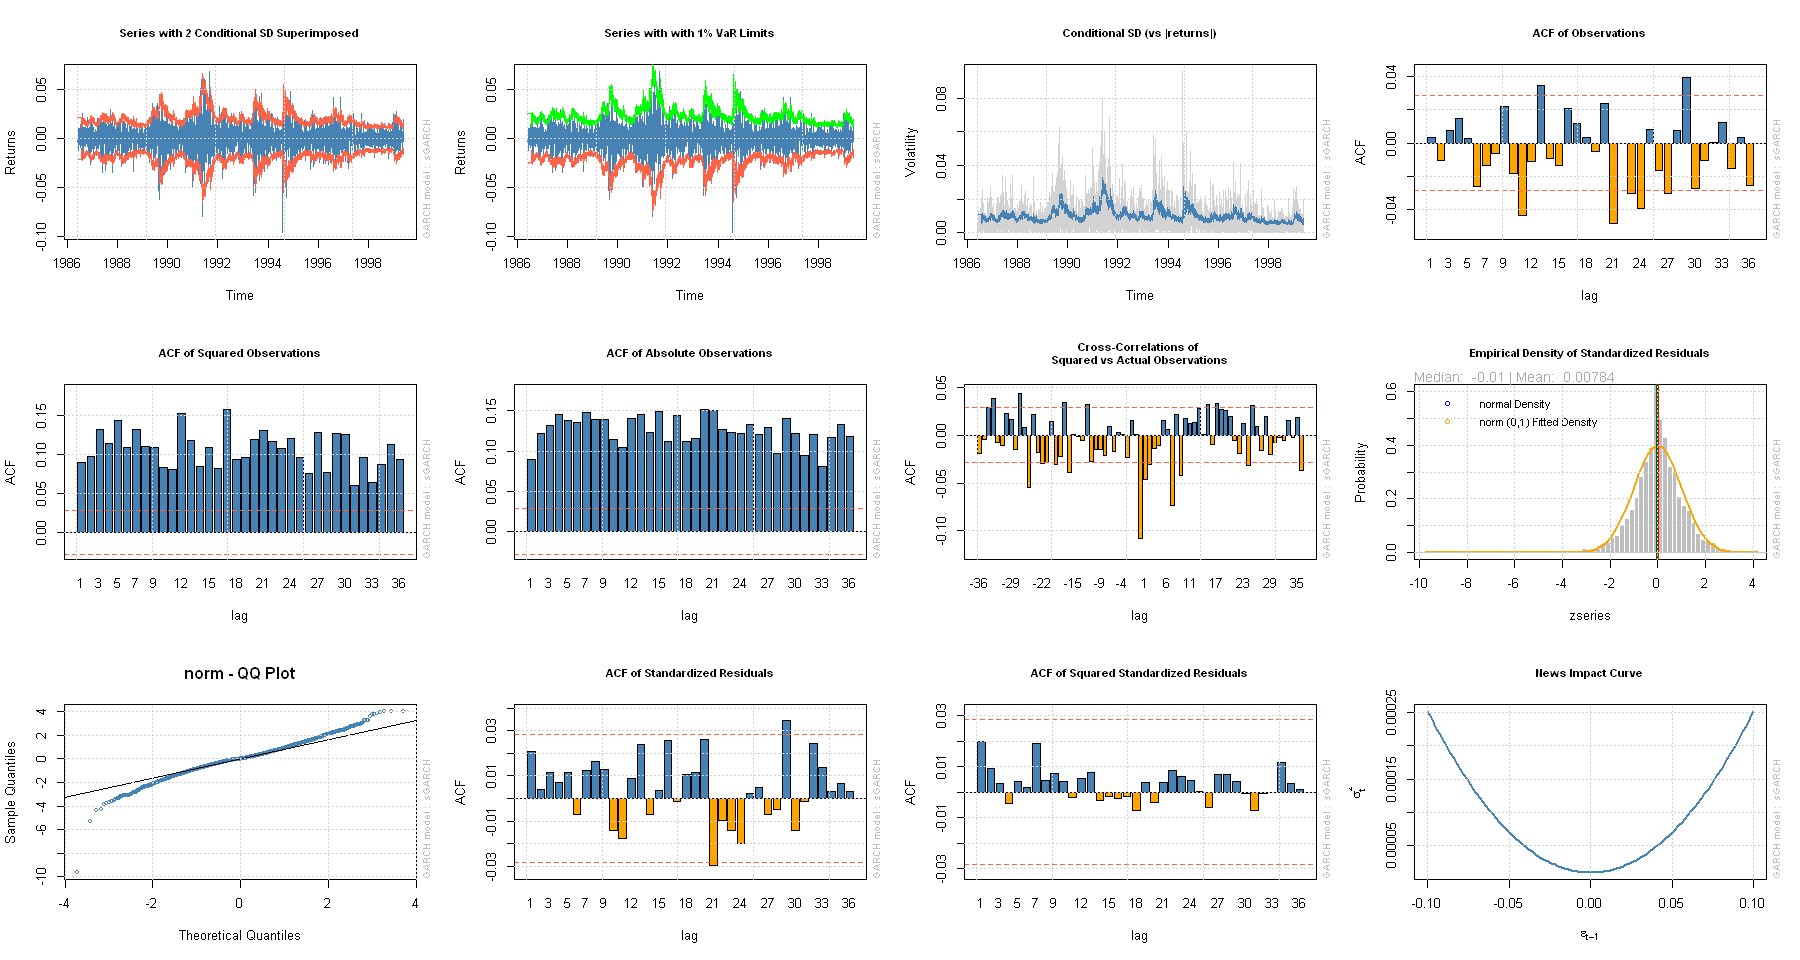

In [89]:
plot(gold_garch12, which = 'all') 

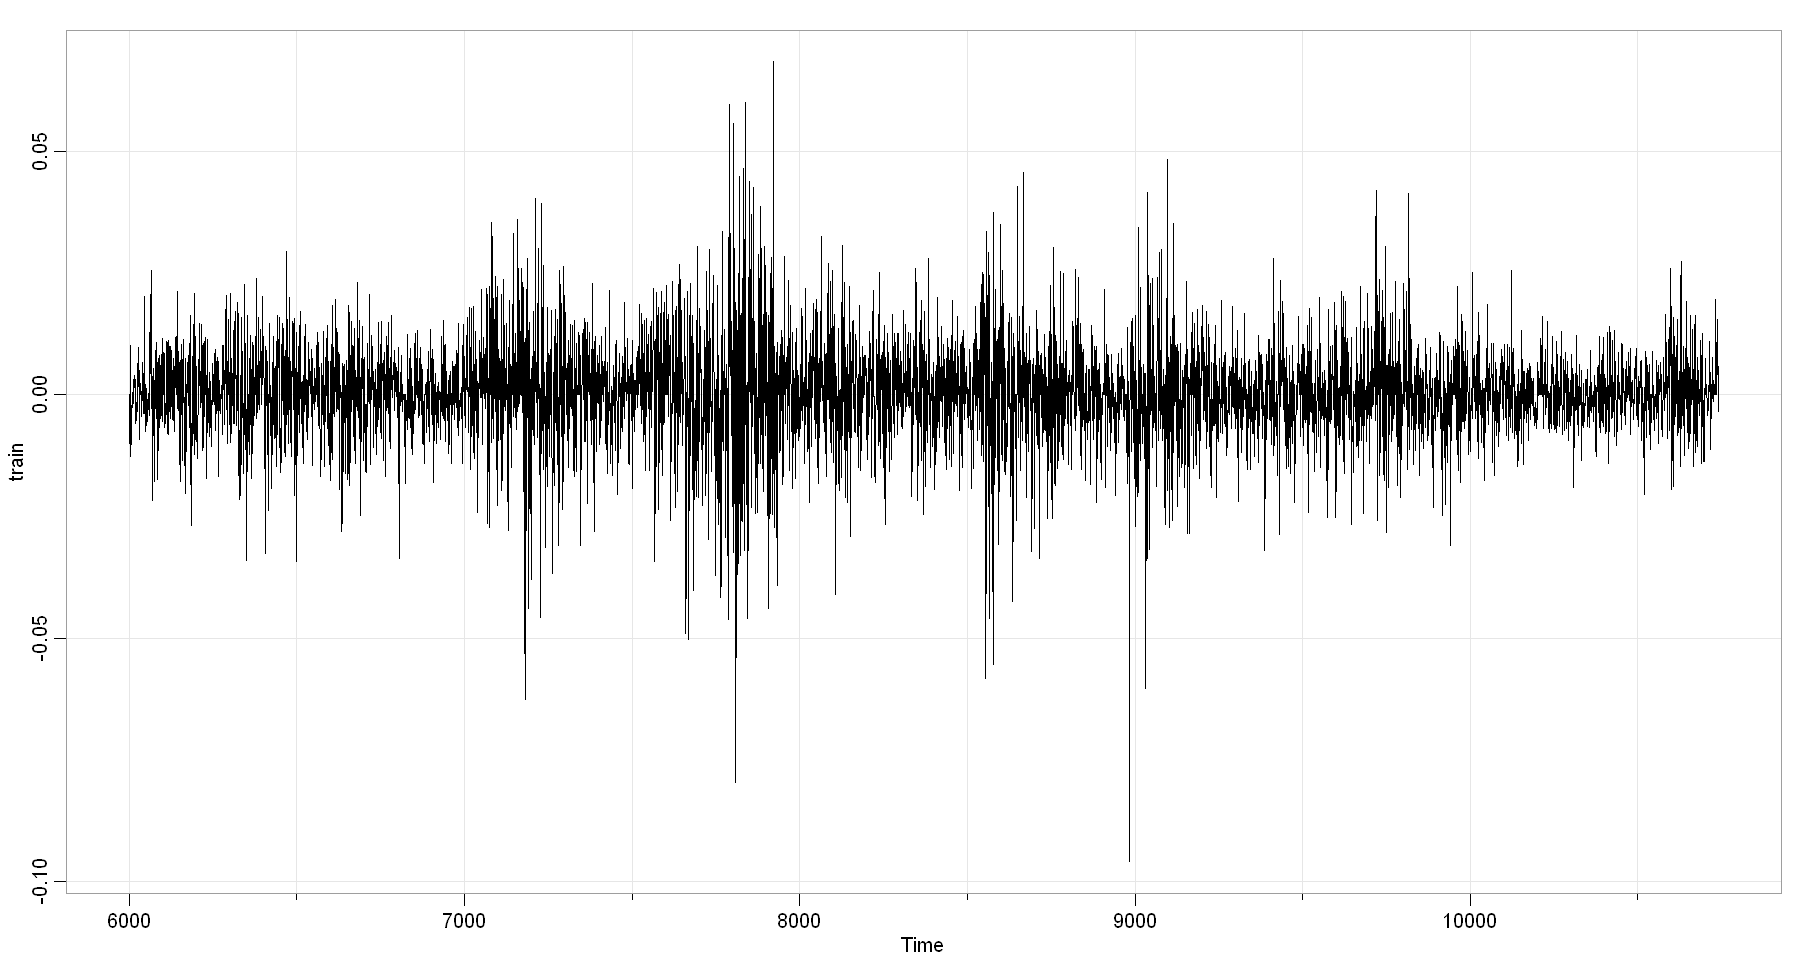

In [90]:
tsplot(train)
lines(gold_garch12@fit$fitted.values, col= 2)

In [94]:
predict_gold12 = ugarchforecast(gold_garch12,n.ahead = 50)
predict_gold12


*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: sGARCH
Horizon: 50
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=1999-05-29]:
        Series    Sigma
T+1  8.720e-05 0.008198
T+2  5.271e-05 0.007397
T+3  6.026e-05 0.006295
T+4  6.759e-05 0.007198
T+5  7.471e-05 0.007666
T+6  8.162e-05 0.006875
T+7  8.833e-05 0.007890
T+8  9.485e-05 0.006550
T+9  1.012e-04 0.006595
T+10 1.073e-04 0.006056
T+11 1.133e-04 0.007259
T+12 1.191e-04 0.008170
T+13 1.247e-04 0.008019
T+14 1.302e-04 0.007102
T+15 1.355e-04 0.007410
T+16 1.406e-04 0.007308
T+17 1.456e-04 0.007863
T+18 1.505e-04 0.008054
T+19 1.552e-04 0.007906
T+20 1.598e-04 0.007242
T+21 1.642e-04 0.007770
T+22 1.685e-04 0.008152
T+23 1.727e-04 0.007262
T+24 1.768e-04 0.007318
T+25 1.807e-04 0.007614
T+26 1.846e-04 0.007295
T+27 1.883e-04 0.008086
T+28 1.919e-04 0.007432
T+29 1.954e-04 0.007616
T+30 1.989e-04 0.007025
T+31 2.022e-04 0.007432
T+32 2.054e-04 0.007766

In [95]:
predict_gold12@forecast$sigmaFor #Es el desvio standar ??

,1999-05-29
T+1,0.008198152
T+2,0.007397222
T+3,0.006295432
T+4,0.007198253
T+5,0.007665694
T+6,0.006875126
T+7,0.007889627
T+8,0.006549587
T+9,0.006594769
T+10,0.006056015


In [96]:
predict_gold12@forecast$seriesFor # es la media 

,1999-05-29
T+1,8.720190e-05
T+2,5.271294e-05
T+3,6.026156e-05
T+4,6.759139e-05
T+5,7.470876e-05
T+6,8.161983e-05
T+7,8.833058e-05
T+8,9.484682e-05
T+9,1.011742e-04
T+10,1.073181e-04


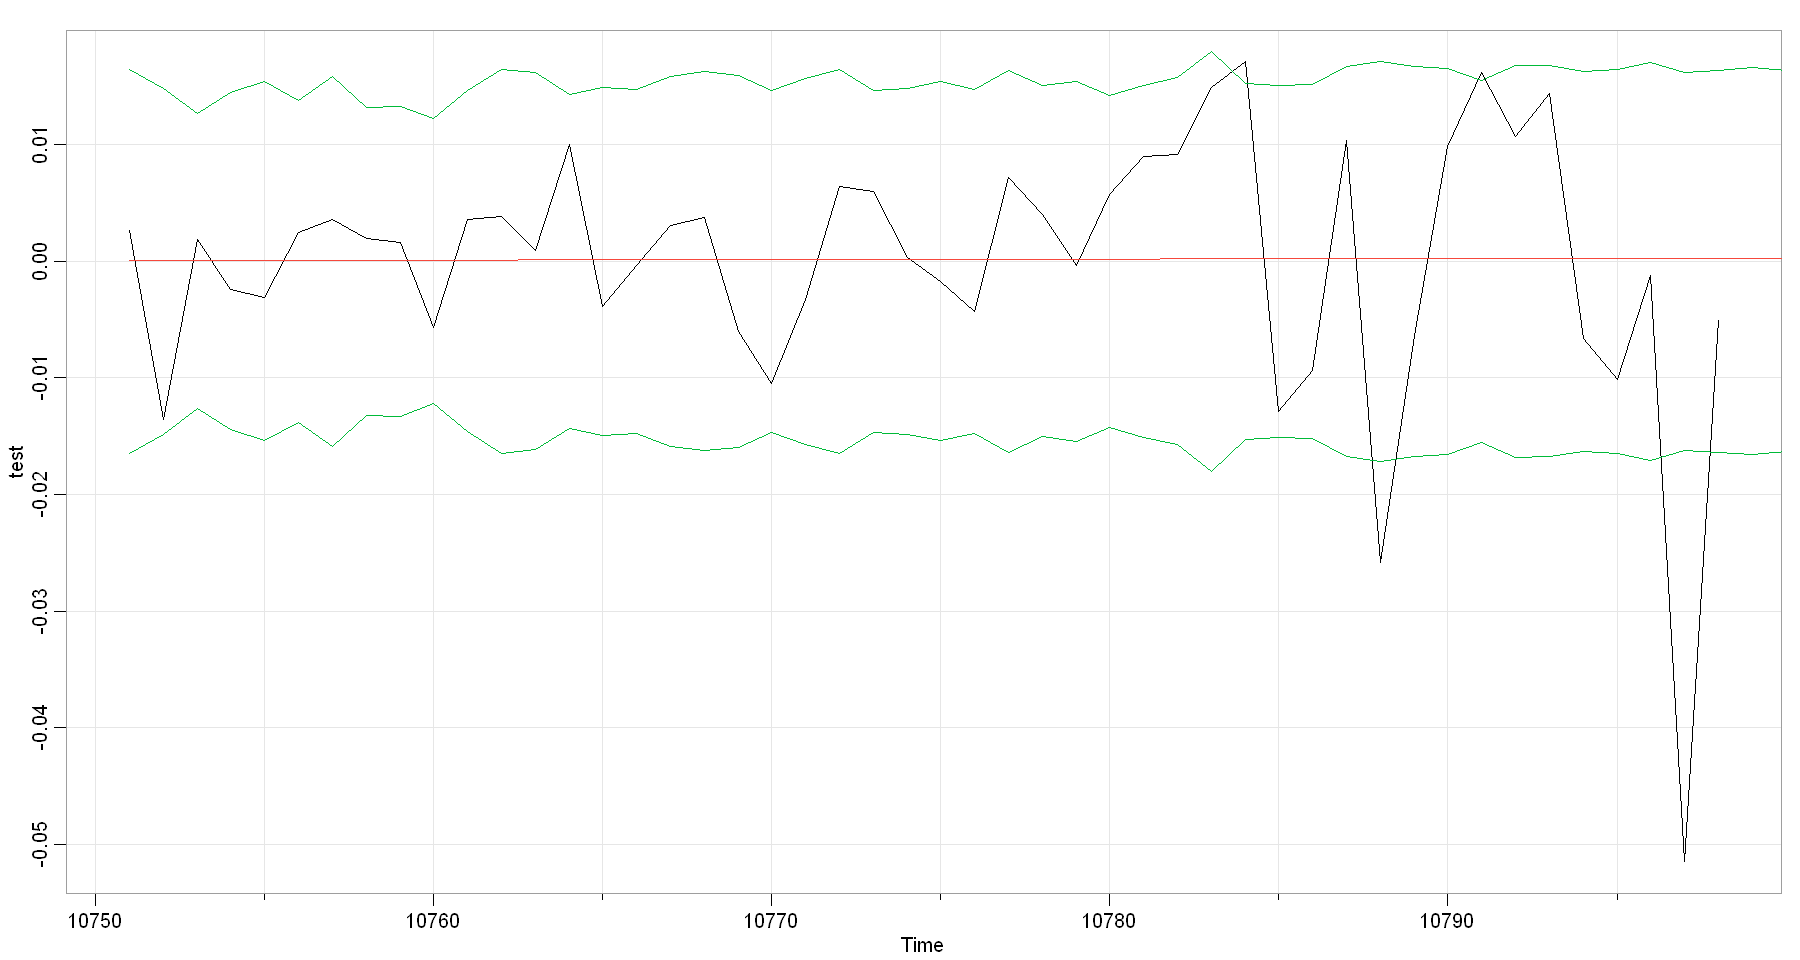

In [97]:
tsplot(test)
lines(ts(predict_gold12@forecast$seriesFor,start = 10751),col=2)
lines(ts(predict_gold12@forecast$seriesFor + 2*predict_gold12@forecast$sigmaFor,start = 10751),col=3)
lines(-ts(predict_gold12@forecast$seriesFor + 2*predict_gold12@forecast$sigmaFor,start = 10751),col=3)

# egarch (1,1)

In [70]:
gold_egarch11_spec <-  ugarchspec(variance.model = list(model="eGARCH",         #Other options are egarch, fgarch, etc.
                                                     garchOrder=c(1,1)), # You can modify the order GARCH(m,s) here
                               mean.model = list(armaOrder=c(5,2)), #Specify your ARMA model implying your model should be stationary.
                               distribution.model = "norm")         #Other distribution are "std" for t-distribution, and "ged" for General Error Distribution
gold_egarch11 <- ugarchfit(spec=gold_egarch11_spec, 
                              data=train)

In [71]:
gold_egarch11


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: eGARCH(1,1)
Mean Model	: ARFIMA(5,0,2)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error     t value Pr(>|t|)
mu      0.000419    0.000119      3.5173 0.000436
ar1    -0.057807    0.010675     -5.4153 0.000000
ar2    -0.983394    0.002266   -434.0533 0.000000
ar3     0.030686    0.007429      4.1306 0.000036
ar4     0.011029    0.003388      3.2553 0.001133
ar5     0.023682    0.008646      2.7392 0.006159
ma1     0.070864    0.006444     10.9965 0.000000
ma2     0.988618    0.000002 599482.1581 0.000000
omega  -0.058467    0.001096    -53.3314 0.000000
alpha1  0.008190    0.005185      1.5798 0.114154
beta1   0.992930    0.000112   8839.2908 0.000000
gamma1  0.100733    0.001535     65.6426 0.000000

Robust Standard Errors:
        Estimate

# egarch (1,2)

In [72]:
gold_egarch12_spec <-  ugarchspec(variance.model = list(model="eGARCH",         #Other options are egarch, fgarch, etc.
                                                     garchOrder=c(1,2)), # You can modify the order GARCH(m,s) here
                               mean.model = list(armaOrder=c(5,2)), #Specify your ARMA model implying your model should be stationary.
                               distribution.model = "norm")         #Other distribution are "std" for t-distribution, and "ged" for General Error Distribution
gold_egarch12 <- ugarchfit(spec=gold_egarch12_spec, 
                              data=train)

In [73]:
gold_egarch12


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: eGARCH(1,2)
Mean Model	: ARFIMA(5,0,2)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error     t value Pr(>|t|)
mu      0.000419    0.000121  3.4696e+00 0.000521
ar1    -0.057793    0.004706 -1.2282e+01 0.000000
ar2    -0.983363    0.002048 -4.8008e+02 0.000000
ar3     0.030707    0.008513  3.6071e+00 0.000310
ar4     0.011067    0.003294  3.3595e+00 0.000781
ar5     0.023694    0.002983  7.9434e+00 0.000000
ma1     0.070857    0.002954  2.3990e+01 0.000000
ma2     0.988620    0.000001  1.3210e+06 0.000000
omega  -0.058312    0.015181 -3.8411e+00 0.000122
alpha1  0.008192    0.005268  1.5549e+00 0.119970
beta1   0.999991    0.000097  1.0359e+04 0.000000
beta2  -0.007040    0.001688 -4.1718e+00 0.000030
gamma1  0.100131    0.002392  4.1865e+01 

# EGARCH (2,1)

In [74]:
gold_egarch21_spec <-  ugarchspec(variance.model = list(model="eGARCH",         #Other options are egarch, fgarch, etc.
                                                     garchOrder=c(2,1)), # You can modify the order GARCH(m,s) here
                               mean.model = list(armaOrder=c(5,2)), #Specify your ARMA model implying your model should be stationary.
                               distribution.model = "norm")         #Other distribution are "std" for t-distribution, and "ged" for General Error Distribution
gold_egarch21 <- ugarchfit(spec=gold_egarch21_spec, 
                              data=train)

In [75]:
gold_egarch21


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: eGARCH(2,1)
Mean Model	: ARFIMA(5,0,2)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error     t value Pr(>|t|)
mu      0.000439    0.000095      4.6128 0.000004
ar1    -0.064186    0.003760    -17.0708 0.000000
ar2    -0.984342    0.002544   -386.9648 0.000000
ar3     0.028857    0.003743      7.7090 0.000000
ar4     0.009709    0.001599      6.0723 0.000000
ar5     0.026913    0.003044      8.8413 0.000000
ma1     0.072160    0.004372     16.5034 0.000000
ma2     0.987223    0.000002 417913.0718 0.000000
omega  -0.064903    0.000947    -68.5168 0.000000
alpha1 -0.134989    0.019915     -6.7783 0.000000
alpha2  0.152500    0.020250      7.5309 0.000000
beta1   0.992269    0.000015  64654.3469 0.000000
gamma1  0.046486    0.028708      1.6193 

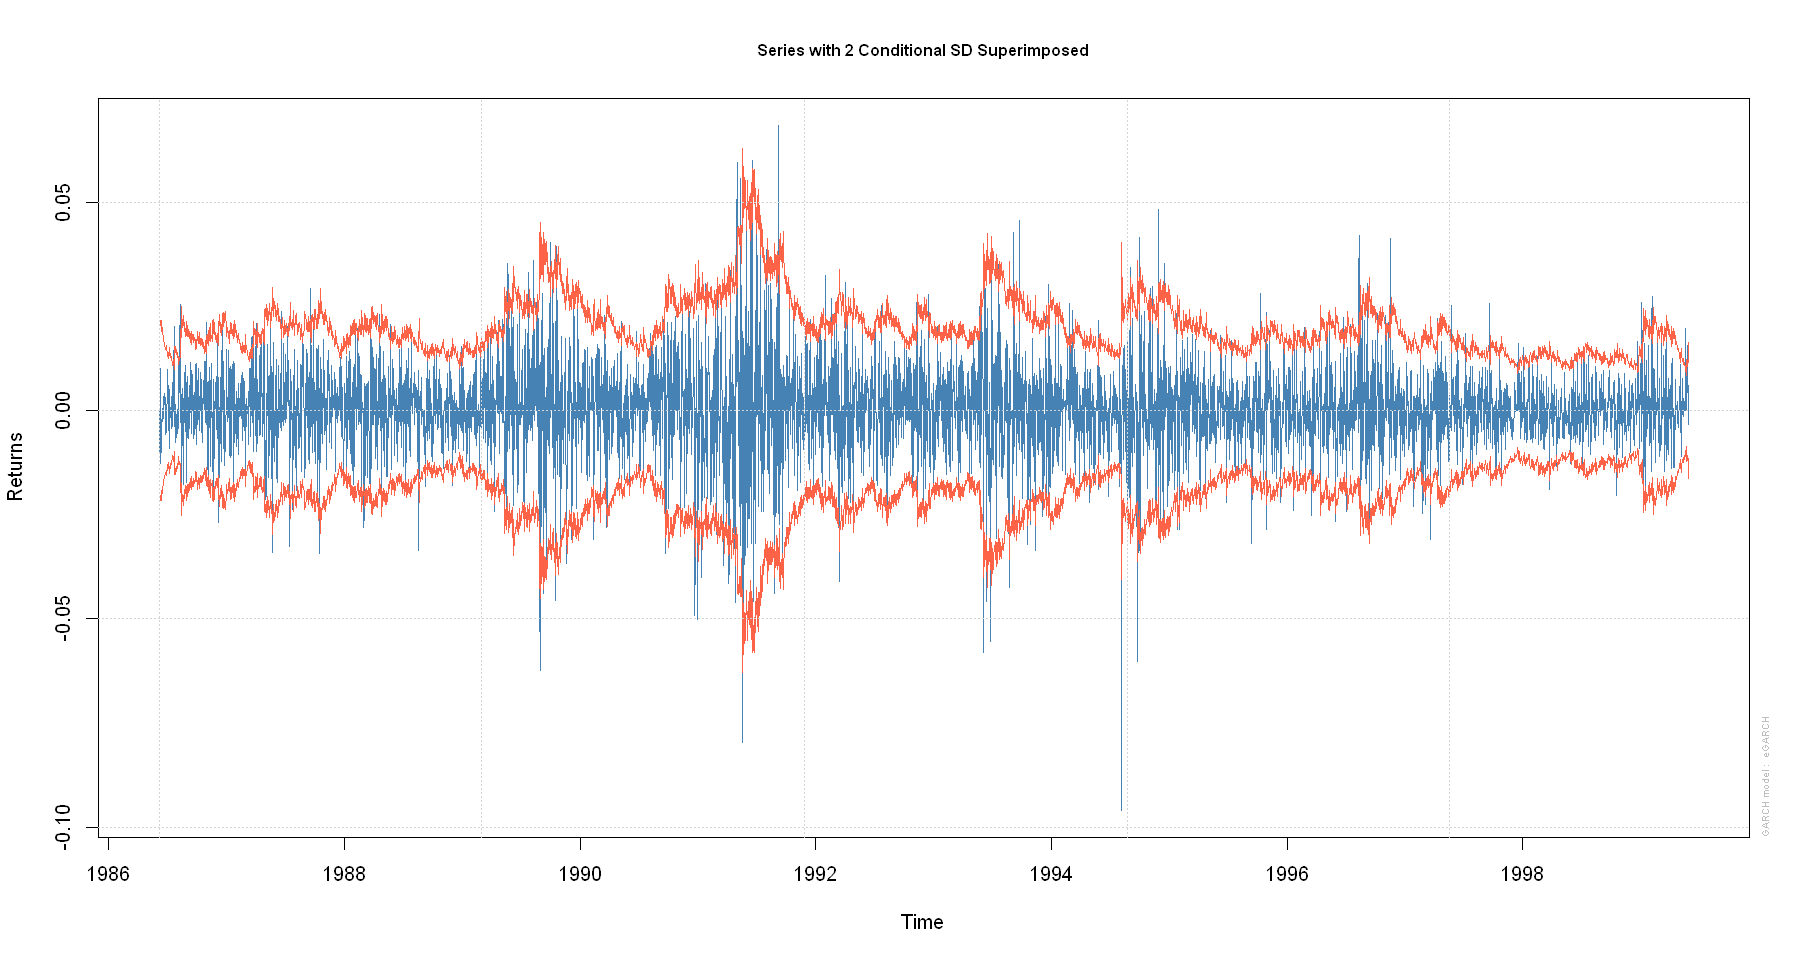

In [76]:
plot(gold_egarch21, which = 1) 

# EGARCH (3,1)

In [77]:
gold_egarch31_spec <-  ugarchspec(variance.model = list(model="eGARCH",         #Other options are egarch, fgarch, etc.
                                                     garchOrder=c(3,1)), # You can modify the order GARCH(m,s) here
                               mean.model = list(armaOrder=c(5,2)), #Specify your ARMA model implying your model should be stationary.
                               distribution.model = "norm")         #Other distribution are "std" for t-distribution, and "ged" for General Error Distribution
gold_egarch31 <- ugarchfit(spec=gold_egarch31_spec, 
                              data=train)

In [78]:
gold_egarch31


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: eGARCH(3,1)
Mean Model	: ARFIMA(5,0,2)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error     t value Pr(>|t|)
mu      0.000436    0.000122      3.5793 0.000345
ar1    -0.061325    0.002427    -25.2681 0.000000
ar2    -0.983929    0.003683   -267.1240 0.000000
ar3     0.030527    0.005578      5.4725 0.000000
ar4     0.010055    0.003137      3.2057 0.001347
ar5     0.026125    0.000660     39.5544 0.000000
ma1     0.071616    0.003423     20.9204 0.000000
ma2     0.987464    0.000001 795648.7219 0.000000
omega  -0.069985    0.001199    -58.3759 0.000000
alpha1 -0.132014    0.019330     -6.8293 0.000000
alpha2  0.119344    0.028274      4.2210 0.000024
alpha3  0.033059    0.020797      1.5896 0.111932
beta1   0.991699    0.000002 547367.3067 

# EGARCH (4,1)

In [79]:
gold_egarch41_spec <-  ugarchspec(variance.model = list(model="eGARCH",         #Other options are egarch, fgarch, etc.
                                                     garchOrder=c(4,1)), # You can modify the order GARCH(m,s) here
                               mean.model = list(armaOrder=c(5,2)), #Specify your ARMA model implying your model should be stationary.
                               distribution.model = "norm")         #Other distribution are "std" for t-distribution, and "ged" for General Error Distribution
gold_egarch41 <- ugarchfit(spec=gold_egarch41_spec, 
                              data=train)

In [80]:
gold_egarch41


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: eGARCH(4,1)
Mean Model	: ARFIMA(5,0,2)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error     t value Pr(>|t|)
mu      0.000378    0.000056  6.7890e+00  0.00000
ar1    -0.024516    0.000006 -4.0670e+03  0.00000
ar2    -1.029888    0.000075 -1.3645e+04  0.00000
ar3     0.057541    0.000003  2.2584e+04  0.00000
ar4    -0.030109    0.000005 -5.7321e+03  0.00000
ar5     0.029453    0.000006  4.9669e+03  0.00000
ma1     0.055186    0.000011  5.1626e+03  0.00000
ma2     1.002140    0.000000  1.1663e+08  0.00000
omega  -0.065808    0.001188 -5.5415e+01  0.00000
alpha1 -0.137185    0.015844 -8.6584e+00  0.00000
alpha2  0.120647    0.004482  2.6917e+01  0.00000
alpha3  0.033307    0.024407  1.3647e+00  0.17235
alpha4  0.002696    0.021092  1.2782e-01 

# Comparo AIC

In [81]:
print(paste0("AIC SGARCH(1,2): ", infocriteria(gold_garch12)[1]))
print(paste0("AIC EGARCH(1,1): ", infocriteria(gold_egarch11)[1]))
print(paste0("AIC EGARCH(1,2): ", infocriteria(gold_egarch12)[1]))
print(paste0("AIC EGARCH(2,1): ", infocriteria(gold_egarch21)[1]))
print(paste0("AIC EGARCH(3,1): ", infocriteria(gold_egarch31)[1]))
print(paste0("AIC EGARCH(4,1): ", infocriteria(gold_egarch41)[1]))

[1] "AIC SGARCH(1,2): -6.41564853787122"
[1] "AIC EGARCH(1,1): -6.41679465522713"
[1] "AIC EGARCH(1,2): -6.41638695099087"
[1] "AIC EGARCH(2,1): -6.4271121235592"
[1] "AIC EGARCH(3,1): -6.42715400807128"
[1] "AIC EGARCH(4,1): -6.42882906515085"


# Comparo BIC

In [82]:
print(paste0("BIC SGARCH(1,2): ", infocriteria(gold_garch12)[2]))
print(paste0("BIC EGARCH(1,1): ", infocriteria(gold_egarch11)[2]))
print(paste0("BIC EGARCH(1,2): ", infocriteria(gold_egarch12)[2]))
print(paste0("BIC EGARCH(2,1): ", infocriteria(gold_egarch21)[2]))
print(paste0("BIC EGARCH(3,1): ", infocriteria(gold_egarch31)[2]))
print(paste0("BIC EGARCH(4,1): ", infocriteria(gold_egarch41)[2]))

[1] "BIC SGARCH(1,2): -6.35428342001025"
[1] "BIC EGARCH(1,1): -6.40043062379754"
[1] "BIC EGARCH(1,2): -6.39865925027548"
[1] "BIC EGARCH(2,1): -6.40802075355801"
[1] "BIC EGARCH(3,1): -6.40533529949849"
[1] "BIC EGARCH(4,1): -6.40428301800647"


# Prediccion con nuestro mejor modelo EGARCH

In [83]:
predict_gold = ugarchforecast(gold_egarch21,n.ahead = 50)
predict_gold


*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: eGARCH
Horizon: 50
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=1999-05-29]:
        Series    Sigma
T+1  7.447e-04 0.007548
T+2  7.354e-04 0.007625
T+3  5.526e-04 0.007665
T+4  6.769e-05 0.007705
T+5  4.206e-04 0.007745
T+6  8.197e-04 0.007785
T+7  4.307e-04 0.007824
T+8  6.335e-05 0.007864
T+9  4.717e-04 0.007903
T+10 8.092e-04 0.007943
T+11 3.820e-04 0.007982
T+12 7.490e-05 0.008021
T+13 5.190e-04 0.008060
T+14 7.947e-04 0.008099
T+15 3.359e-04 0.008138
T+16 9.234e-05 0.008177
T+17 5.636e-04 0.008215
T+18 7.745e-04 0.008254
T+19 2.930e-04 0.008292
T+20 1.152e-04 0.008330
T+21 6.046e-04 0.008368
T+22 7.491e-04 0.008406
T+23 2.539e-04 0.008444
T+24 1.429e-04 0.008482
T+25 6.416e-04 0.008520
T+26 7.191e-04 0.008557
T+27 2.192e-04 0.008594
T+28 1.749e-04 0.008632
T+29 6.740e-04 0.008669
T+30 6.853e-04 0.008706
T+31 1.892e-04 0.008743
T+32 2.105e-04 0.008779

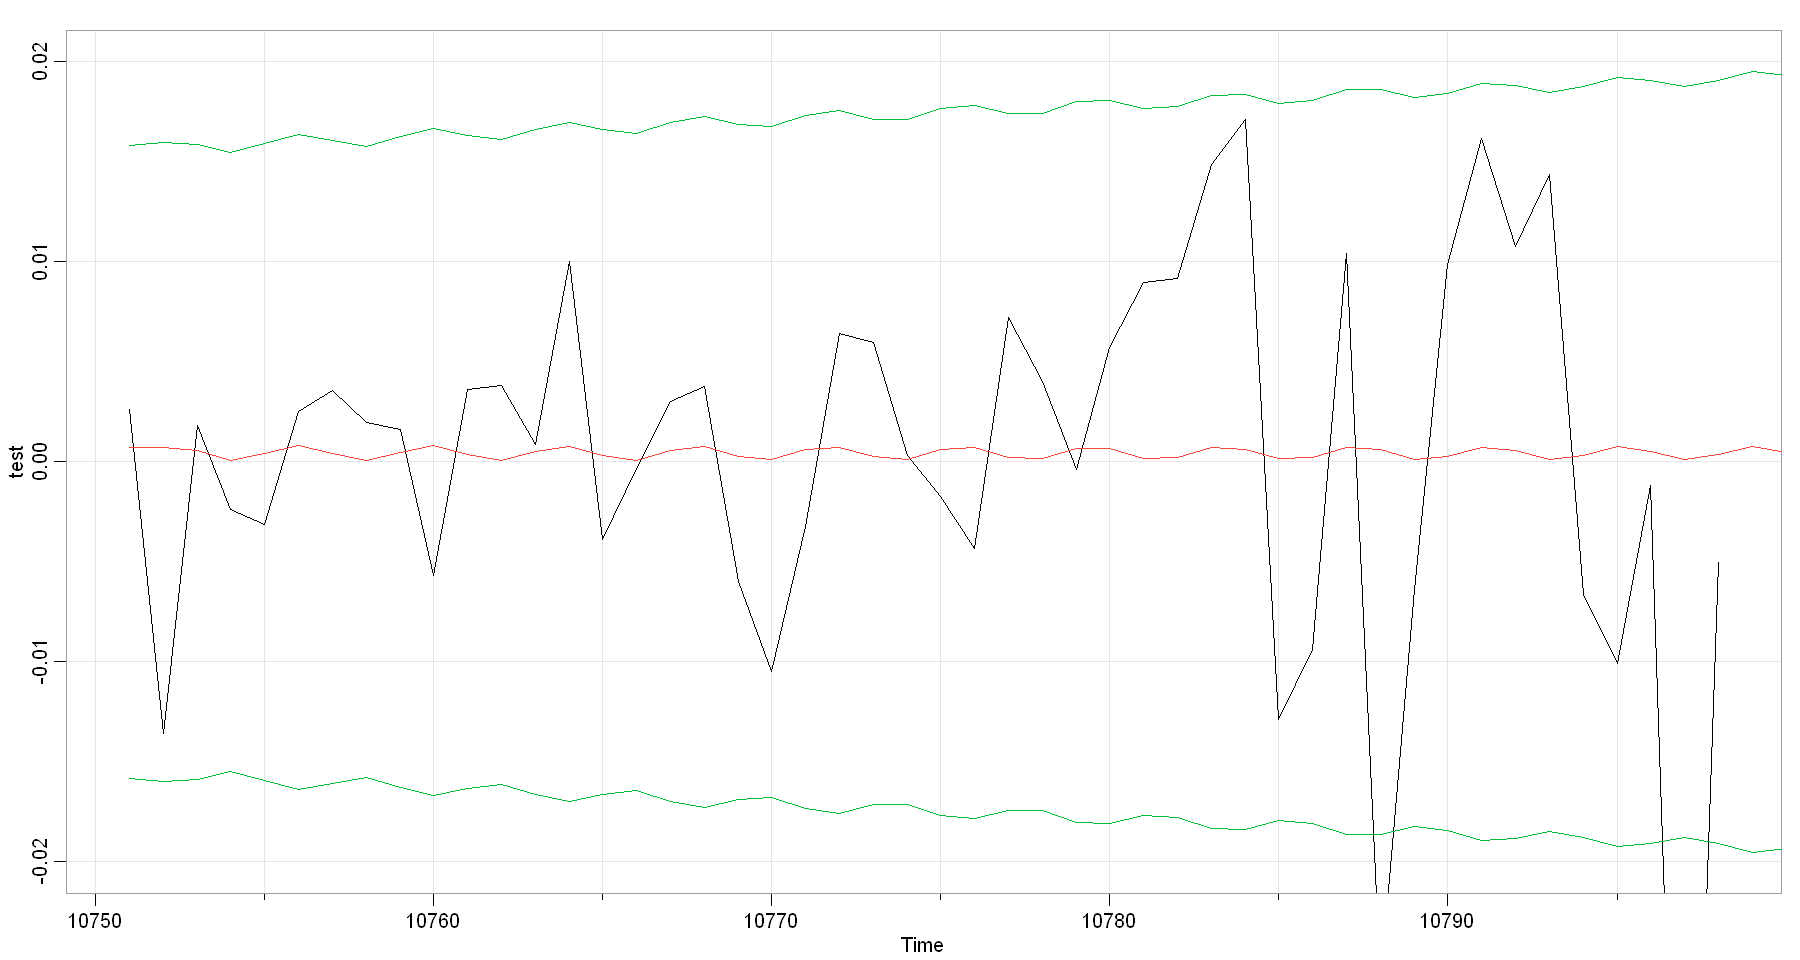

In [84]:
tsplot(test,ylim = c(-0.02,0.02))
lines(ts(predict_gold@forecast$seriesFor,start = 10751),col=2)
lines(ts(predict_gold@forecast$seriesFor + 2*predict_gold@forecast$sigmaFor,start = 10751),col=3)
lines(-ts(predict_gold@forecast$seriesFor + 2*predict_gold@forecast$sigmaFor,start = 10751),col=3)